In [716]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 # First Dataset (Military Spending)

In [717]:
#load the data, if excel
ms = pd.read_excel('Military_API_MS.MIL.XPND.GD.ZS_DS2_en_excel_v2_761.xls', skiprows=3)
ms.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,1.5370,2.0919,1.8824,2.4561,2.4864,...,1.7591,1.5352,1.2746,1.2724,1.1188,1.0740,1.1028,1.0058,1.0001,NaN
2,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2980,0.9946,0.9568,0.9452,1.0067,1.1710,1.3589,1.8279,NaN,NaN
3,Africa Western and Central,AFW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,1.3154,1.3140,1.4423,1.4686,...,0.7314,0.6773,0.8265,0.8221,0.8470,0.8010,0.9497,1.1650,0.9733,NaN
4,Angola,AGO,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6985,3.1054,2.7333,2.5080,1.9558,1.7391,1.7002,1.2899,1.3287,NaN


In [718]:
#finding the top 10 military spenders from 2018-2022

#sum the military spending across all years for each country
military_total = ms.groupby('Country Name').sum()

#calculate the total military spending for each country from 2017 to 2022
military_total['Total'] = military_total.loc[:, '2017':'2022'].sum(axis=1)

#sort the countries based on their total military spending
top_ten_countries = military_total.nlargest(50, 'Total')['Total']

#print the top ten countries
print(top_ten_countries)

Country Name
Saudi Arabia                                         51.6773
Ukraine                                              50.1837
Oman                                                 43.8760
Algeria                                              34.4650
Kuwait                                               33.9087
Arab World                                           33.5488
Middle East & North Africa                           30.9039
Israel                                               30.5285
Jordan                                               28.1673
Armenia                                              26.5278
Azerbaijan                                           26.3986
Russian Federation                                   23.7774
Bahrain                                              23.1634
Morocco                                              21.4535
United States                                        20.6879
Lebanon                                              19.9980
Namibia    

In [719]:
#listing the top countries
top_countries = ['United States', 'China', 'India', 'Saudi Arabia', 'Russian Federation', \
                 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']

#years 2017 to 2022
years = list(range(2018, 2023))
years

[2018, 2019, 2020, 2021, 2022]

In [720]:
#filter rows for the top countries
military = ms[ms['Country Name'].isin(top_countries)]

#filter columns for the specified years
military = military[['Country Name'] + [str(year) for year in years]]


military

,Country Name,2018,2019,2020,2021,2022
40,China,1.6736,1.6829,1.7567,1.6131,1.5954
55,Germany,1.1705,1.2622,1.3736,1.3268,1.3901
77,France,1.8430,1.8365,2.0028,1.9154,1.9387
81,United Kingdom,1.9400,1.9813,2.1568,2.1616,2.2272
109,India,2.4243,2.5486,2.8125,2.4714,2.4252
119,Japan,0.9625,0.9922,1.0178,1.0183,1.0777
126,"Korea, Rep.",2.4968,2.6713,2.8033,2.8090,2.7177
202,Russian Federation,3.7198,3.8603,4.1715,3.7205,4.0563
205,Saudi Arabia,9.1372,8.1336,9.1785,7.5815,7.4227
251,United States,3.3239,3.4346,3.6960,3.4580,3.4549


In [721]:
# Create a new dataset for Military Average
military_average = military[["Country Name", "2018", "2019", "2020", "2021", "2022"]].copy()
military_average["Average Spending"] = military_average[["2018", "2019", "2020", "2021", "2022"]].mean(axis=1)

# Display the new dataset
military_average.head()

,Country Name,2018,2019,2020,2021,2022,Average Spending
40,China,1.6736,1.6829,1.7567,1.6131,1.5954,1.6643
55,Germany,1.1705,1.2622,1.3736,1.3268,1.3901,1.3046
77,France,1.8430,1.8365,2.0028,1.9154,1.9387,1.9073
81,United Kingdom,1.9400,1.9813,2.1568,2.1616,2.2272,2.0934
109,India,2.4243,2.5486,2.8125,2.4714,2.4252,2.5364


# 2nd Dataset (Sipri Milex Data)

In [722]:
# read the excel file and check the sheets name
df = pd.ExcelFile("SIPRI-Milex-data-1948-2023.xlsx")
print(df.sheet_names)
# set all the data to 4 decimal
pd.set_option("display.float.format", lambda x: "%.4f" % x) 

['Front page', 'Regional totals', 'Local currency financial years', 'Local currency calendar years', 'Constant (2022) US$', 'Current US$', 'Share of GDP', 'Per capita', 'Share of Govt. spending', 'Footnotes']


### getting all sheets of Sipri Dataset

In [723]:
# import the sheet "military spending in current USD", skip rows and set index.
military_spending = df.parse("Current US$", skiprows=5, index_col=0)
# import the sheet "military spending Share of GDP", skip rows and set index.
military_GDP = df.parse("Share of GDP", skiprows=5, index_col=0)  
# import the sheet "per person military spending", skip rows and set index.
military_capta = df.parse("Per capita", skiprows=6, index_col=0)  
# veiw the data..head()
military_spending.head()

,Notes,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,§,...,...,...,...,...,...,...,...,...,...,9724.3800,10412.7140,10217.0817,10073.3640,9583.7243,10303.6006,9708.2774,9112.4611,9145.8102,18263.9680
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,3755.6525,...,...,...,...,...,...,...,...,...


In [724]:
military_GDP.head()

,Notes,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,§,...,...,...,...,...,...,...,...,...,...,0.0555,0.0627,0.0638,0.0592,0.0548,0.0600,0.0666,0.0557,0.0470,0.0817
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,0.1548,...,...,...,...,...,...,...,...,...


In [725]:
military_capta.head()

,Notes,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,§,42.4292,34.3231,35.4365,21.6231,39.3787,46.6810,47.7829,43.3547,50.1097,...,250.8870,263.3264,253.2805,244.8736,228.5812,241.2739,223.4253,206.2669,203.6793,400.4729
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,615.8827,...,...,...,...,...,...,...,...,...
Morocco,§,38.6691,41.0202,43.5359,45.9599,48.3653,48.5057,52.1048,54.0584,53.5993,...,118.2111,94.2435,94.7683,97.4291,102.8963,102.5045,131.6732,145.0594,133.3501,137.0224


In [726]:
years = [year for year in  range(2018,2022+1)]
years

[2018, 2019, 2020, 2021, 2022]

In [727]:
military_spending = military_spending.reset_index()
military_spending = military_spending[['Country'] + years]
military_spending

military_GDP = military_GDP.reset_index()
military_GDP = military_GDP[['Country'] + years]
military_GDP

military_capta = military_capta.reset_index()
military_capta = military_capta[['Country'] + years]
military_capta

,Country,2018,2019,2020,2021,2022
0,Africa,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN
2,Algeria,228.5812,241.2739,223.4253,206.2669,203.6793
3,Libya,...,...,...,...,...
4,Morocco,102.8963,102.5045,131.6732,145.0594,133.3501
...,...,...,...,...,...,...
187,Syria,...,...,...,...,...
188,Türkiye,...,...,...,...,...
189,United Arab Emirates,...,...,...,...,...
190,"Yemen, North",xxx,xxx,xxx,xxx,xxx


In [728]:
#convert all values to numbers and remove non-numeric values 
military_spending[years] = military_spending[years].apply(pd.to_numeric,errors='coerce').dropna()
military_GDP[years] = military_GDP[years].apply(pd.to_numeric,errors='coerce').dropna()
military_capta[years] = military_capta[years].apply(pd.to_numeric,errors='coerce').dropna()

In [729]:
military_spending

,Country,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN
3,Algeria,9583.7243,10303.6006,9708.2774,9112.4611,9145.8102
4,Libya,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
188,Syria,NaN,NaN,NaN,NaN,NaN
189,Türkiye,19648.6938,20436.9171,17478.4137,15567.4100,10779.8963
190,United Arab Emirates,NaN,NaN,NaN,NaN,NaN
191,"Yemen, North",NaN,NaN,NaN,NaN,NaN


In [730]:
military_spending = military_spending.dropna()
military_GDP = military_GDP.dropna()
military_capta = military_capta.dropna()
military_spending

,Country,2018,2019,2020,2021,2022
3,Algeria,9583.7243,10303.6006,9708.2774,9112.4611,9145.8102
5,Morocco,3696.8569,3721.3238,4830.9564,5378.3665,4995.0281
6,Tunisia,844.2274,1000.9221,1157.3724,1250.4544,1156.1869
8,Angola,1983.6137,1470.9387,993.5944,981.4510,1622.7637
9,Benin,90.2124,68.1124,71.8178,97.4245,110.0104
...,...,...,...,...,...,...
183,Kuwait,7165.2791,7373.5197,6941.0423,9024.3355,8244.1214
184,Lebanon,2775.5578,2326.0583,431.9911,171.5874,218.7477
185,Oman,7565.3446,6551.0403,6095.7087,5783.6151,5783.4850
187,Saudi Arabia,74612.2667,65362.6667,64558.4000,63194.6667,70920.0000


In [731]:
military_GDP

,Country,2018,2019,2020,2021,2022
3,Algeria,0.0548,0.0600,0.0666,0.0557,0.0470
5,Morocco,0.0290,0.0287,0.0398,0.0376,0.0381
6,Tunisia,0.0198,0.0238,0.0271,0.0264,0.0247
8,Angola,0.0196,0.0174,0.0174,0.0130,0.0132
9,Benin,0.0063,0.0047,0.0046,0.0055,0.0063
...,...,...,...,...,...,...
183,Kuwait,0.0519,0.0542,0.0657,0.0659,0.0473
184,Lebanon,0.0485,0.0424,0.0303,0.0337,0.0292
185,Oman,0.0827,0.0744,0.0803,0.0656,0.0504
187,Saudi Arabia,0.0881,0.0779,0.0879,0.0723,0.0640


In [732]:
#sort by 2022 to find top 10 countries 
military_spending=military_spending.sort_values(by=2022, ascending=False).head(10)
military_spending

,Country,2018,2019,2020,2021,2022
72,United States of America,682491.4000,734344.1000,778397.2000,806230.2000,860692.2000
99,China,232530.5960,240332.5555,257973.4298,285930.5181,291958.4285
151,Russia,61609.2048,65201.3358,61712.5372,65907.7050,102366.6365
94,India,66257.8017,71468.9005,72937.0640,76348.5388,79976.7893
187,Saudi Arabia,74612.2667,65362.6667,64558.4000,63194.6667,70920.0000
174,United Kingdom,55832.9164,56567.6020,58332.3718,65136.2162,64081.6343
161,Germany,46497.6760,49079.4447,53318.7051,56513.1268,56153.1212
160,France,51409.8128,50118.9292,52747.0649,56646.9962,53638.7488
100,Japan,48535.9094,50778.0066,51396.5361,50957.4710,46880.1947
102,"Korea, South",43069.9733,44102.2408,46117.0966,50873.7881,46365.4207


In [733]:
#create a country list has the top 10 countries 
country_list = military_spending['Country'].tolist()
country_list

['United States of America',
 'China',
 'Russia',
 'India',
 'Saudi Arabia',
 'United Kingdom',
 'Germany',
 'France',
 'Japan',
 'Korea, South']

In [734]:
#reindex by country
military_spending = military_spending.set_index('Country')
military_GDP = military_GDP.set_index('Country')
military_capta = military_capta .set_index('Country')

military_spending

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,682491.4000,734344.1000,778397.2000,806230.2000,860692.2000
China,232530.5960,240332.5555,257973.4298,285930.5181,291958.4285
Russia,61609.2048,65201.3358,61712.5372,65907.7050,102366.6365
India,66257.8017,71468.9005,72937.0640,76348.5388,79976.7893
Saudi Arabia,74612.2667,65362.6667,64558.4000,63194.6667,70920.0000
United Kingdom,55832.9164,56567.6020,58332.3718,65136.2162,64081.6343
Germany,46497.6760,49079.4447,53318.7051,56513.1268,56153.1212
France,51409.8128,50118.9292,52747.0649,56646.9962,53638.7488
Japan,48535.9094,50778.0066,51396.5361,50957.4710,46880.1947


In [736]:
country_list

['United States of America',
 'China',
 'Russia',
 'India',
 'Saudi Arabia',
 'United Kingdom',
 'Germany',
 'France',
 'Japan',
 'Korea, South']

In [737]:
military_GDP = military_GDP.loc[country_list]
military_GDP

military_capta = military_capta.loc[country_list]
military_capta

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,2054.8305,2196.5306,2317.0583,2392.3887,2544.2437
China,164.0926,169.0264,181.0429,200.5273,204.7557
Russia,422.9891,447.3751,423.8004,454.2132,707.3769
India,48.3986,51.6725,52.2327,54.2416,56.4340
Saudi Arabia,2130.6833,1824.3969,1793.4383,1757.8489,1947.8700
United Kingdom,840.4395,847.0867,869.8664,968.1220,949.2310
Germany,560.9090,590.2661,639.8577,677.5423,673.5411
France,799.8042,778.2442,818.0376,877.8261,829.9743
Japan,384.4246,403.6664,410.3680,408.9258,378.2125


In [738]:
military_GDP

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,0.0330,0.0341,0.0365,0.0342,0.0334
China,0.0167,0.0168,0.0176,0.0161,0.0162
Russia,0.0372,0.0386,0.0417,0.0361,0.0469
India,0.0242,0.0255,0.0281,0.0248,0.0236
Saudi Arabia,0.0881,0.0779,0.0879,0.0723,0.0640
United Kingdom,0.0194,0.0199,0.0216,0.0207,0.0207
Germany,0.0117,0.0126,0.0137,0.0132,0.0138
France,0.0184,0.0184,0.0200,0.0191,0.0193
Japan,0.0096,0.0099,0.0102,0.0102,0.0111


In [739]:
# calculate total GDP using military spending and percentage of military spending to GDP
gdp = military_spending*100/military_GDP
gdp

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,2065651550.0000,2152139500.0000,2132294950.0000,2359403080.0000,2574410830.0000
China,1389421747.2055,1428076433.1210,1468512025.4999,1781210322.3807,1798719144.8005
Russia,165624047.2694,168900609.7900,147939228.8223,182481830.3168,218264128.4255
India,273308685.5378,280710723.3692,259821969.2873,307808766.5592,338321799.4369
Saudi Arabia,84658378.6667,83856469.3333,73427117.3333,87415610.6667,110857152.0000
United Kingdom,287124285.2875,284938903.0612,269780512.8205,314178679.5048,308987143.2587
Germany,397229795.9232,388950962.8303,387977886.6978,427796830.6528,407752193.9973
France,278945032.6358,272910322.4362,264200615.5249,295898533.5856,277572425.0507
Japan,504270573.4675,511755657.2708,505151512.3130,501051428.2591,423915090.9517


In [740]:
# calculate population by divided military spending by military spending per capita
population = military_spending/military_capta
population

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,332.1400,334.3200,335.9420,336.9980,338.2900
China,1417.0690,1421.8640,1424.9300,1425.8930,1425.8870
Russia,145.6520,145.7420,145.6170,145.1030,144.7130
India,1369.0030,1383.1120,1396.3870,1407.5640,1417.1730
Saudi Arabia,35.0180,35.8270,35.9970,35.9500,36.4090
United Kingdom,66.4330,66.7790,67.0590,67.2810,67.5090
Germany,82.8970,83.1480,83.3290,83.4090,83.3700
France,64.2780,64.4000,64.4800,64.5310,64.6270
Japan,126.2560,125.7920,125.2450,124.6130,123.9520


In [741]:
# calculate GDP per capita, divide GDP by population
gdp_pc = gdp/population
gdp_pc 

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,6219219.4557,6437363.9028,6347211.5722,7001237.6335,7610070.7381
China,980489.8330,1004369.2175,1030585.3800,1249189.3307,1261473.8368
Russia,1137121.6823,1158901.4134,1015947.5118,1257602.0504,1508255.1562
India,199640.6769,202955.8874,186067.3075,218681.8976,238730.0629
Saudi Arabia,2417567.4986,2340594.2260,2039812.1325,2431588.6138,3044773.3253
United Kingdom,4322012.9346,4266893.8298,4023032.1481,4669649.3736,4576977.0439
Germany,4791847.6655,4677815.0146,4655976.7512,5128904.9222,4890874.3433
France,4339665.7120,4237737.9260,4097404.0869,4585370.3427,4294991.6451
Japan,3994032.5487,4068268.7076,4033306.8171,4020860.0087,3419993.9569


## 3rd Dataset (health_spending Spending)

In [742]:
health_spending = pd.read_excel('Health_API_SH.XPD.CHEX.GD.ZS_DS2_en_excel_v2_15.xlsx', skiprows=3)

health_spending.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8408,5.9982,6.0980,5.9539,5.8093,5.8302,5.8818,5.8656,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.5289,10.1053,11.8186,12.6208,14.2084,14.8313,15.5336,21.8279,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5838,3.8065,3.7969,3.8174,3.4303,3.4172,3.8407,4.1407,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4341,2.6058,2.7131,2.7938,2.5888,2.4752,3.2207,2.9601,NaN,NaN


In [743]:
#sum the health_spending spending across all years for each country
health_spending_total = health_spending.groupby('Country Name').sum()

#calculate the total health_spending spending for each country from 2018 to 2023
health_spending_total['Total'] = health_spending_total.loc[:, '2018':'2023'].sum(axis=1)

#sort the countries based on their total health_spending spending
top_ten_health_spending = health_spending_total.nlargest(50, 'Total')['Total']

#print the top ten countries
print(top_ten_health_spending)

Country Name
United States               85.9854
North America               83.8941
Tuvalu                      79.8812
Afghanistan                 66.4013
Germany                     61.4774
Canada                      58.4382
Kiribati                    57.3600
Palau                       56.9860
United Kingdom              55.5563
Marshall Islands            55.2248
Sweden                      55.0200
Post-demographic dividend   53.9464
Liberia                     52.3579
OECD members                52.1288
Portugal                    51.2300
High income                 51.1976
Denmark                     51.1300
Norway                      50.0400
Nauru                       48.4038
Cuba                        48.3771
France                      46.7357
Chile                       46.6606
Armenia                     45.9700
Switzerland                 45.3690
Italy                       45.3500
Iceland                     44.8700
Micronesia, Fed. Sts.       44.7235
Slovenia       

In [744]:
#listing the top countries
top_countries = ['United States', 'China', 'India', 'Saudi Arabia', 'Russian Federation', \
                 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']

#years 2018 to 2022
years = list(range(2018, 2023))
years

[2018, 2019, 2020, 2021, 2022]

In [745]:
#filter rows for the top countries
health_spending = health_spending[health_spending['Country Name'].isin(top_countries)]

#filter columns for the specified years
health_spending = health_spending[['Country Name'] + [str(year) for year in years]]


health_spending

,Country Name,2018,2019,2020,2021,2022
40,China,5.1679,5.3503,5.5936,5.3836,NaN
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547
77,France,11.2080,11.0889,12.1310,12.3079,NaN
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445
109,India,2.8600,2.9500,3.3400,3.2800,NaN
119,Japan,10.7400,10.9700,11.0000,10.8200,NaN
126,"Korea, Rep.",7.4912,8.1748,8.3498,9.3315,9.7205
202,Russian Federation,5.3600,5.6500,7.5700,7.3900,NaN
205,Saudi Arabia,5.3406,5.4674,6.6463,5.9684,NaN
251,United States,16.6296,16.6658,18.7562,17.3626,16.5712


In [746]:
# Define mapping for country names
country_name_mapping = {
    "China": "China",
    "Germany": "Germany",
    "France": "France",
    "United Kingdom": "United Kingdom",
    "India": "India",
    "Japan": "Japan",
    "Korea, Rep.": "Korea, South",
    "Russian Federation": "Russia",
    "Saudi Arabia": "Saudi Arabia",
    "United States": "United States of America"
}

# Replace country names
health_spending["Country Name"] = health_spending["Country Name"].replace(country_name_mapping)

# Display updated DataFrame
print(health_spending)


                 Country Name    2018    2019    2020    2021    2022
40                      China  5.1679  5.3503  5.5936  5.3836     NaN
55                    Germany 11.4805 11.7155 12.6926 12.9341 12.6547
77                     France 11.2080 11.0889 12.1310 12.3079     NaN
81             United Kingdom  9.7308  9.9576 12.1586 12.3647 11.3445
109                     India  2.8600  2.9500  3.3400  3.2800     NaN
119                     Japan 10.7400 10.9700 11.0000 10.8200     NaN
126              Korea, South  7.4912  8.1748  8.3498  9.3315  9.7205
202                    Russia  5.3600  5.6500  7.5700  7.3900     NaN
205              Saudi Arabia  5.3406  5.4674  6.6463  5.9684     NaN
251  United States of America 16.6296 16.6658 18.7562 17.3626 16.5712


In [747]:
health_spending = health_spending.fillna(1)

In [748]:
health_spending

,Country Name,2018,2019,2020,2021,2022
40,China,5.1679,5.3503,5.5936,5.3836,1.0000
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547
77,France,11.2080,11.0889,12.1310,12.3079,1.0000
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445
109,India,2.8600,2.9500,3.3400,3.2800,1.0000
119,Japan,10.7400,10.9700,11.0000,10.8200,1.0000
126,"Korea, South",7.4912,8.1748,8.3498,9.3315,9.7205
202,Russia,5.3600,5.6500,7.5700,7.3900,1.0000
205,Saudi Arabia,5.3406,5.4674,6.6463,5.9684,1.0000
251,United States of America,16.6296,16.6658,18.7562,17.3626,16.5712


In [749]:
# Create a new dataset for health_spending Average
health_spending_average = health_spending[["Country Name", "2018", "2019", "2020", "2021", "2022"]].copy()
health_spending_average["Average Spending"] = health_spending_average[["2018", "2019", "2020", "2021", "2022"]].mean(axis=1)

# Display the new dataset
health_spending_average.head()

,Country Name,2018,2019,2020,2021,2022,Average Spending
40,China,5.1679,5.3503,5.5936,5.3836,1.0000,4.4991
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547,12.2955
77,France,11.2080,11.0889,12.1310,12.3079,1.0000,9.5471
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445,11.1113
109,India,2.8600,2.9500,3.3400,3.2800,1.0000,2.6860


## 4th Dataset (Education Spending)

In [750]:
#load the data, if excel
education_spending = pd.read_excel('Education_API_SE.XPD.TOTL.GD.ZS_DS2_en_excel_v2_560.xlsx', skiprows=3)

education_spending

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8508,5.8878,5.4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7173,4.7510,4.8821,4.8204,4.7397,4.5115,4.3524,4.6744,4.2441,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.6952,3.2558,4.5440,4.3432,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9142,3.1955,2.7836,3.5356,3.0720,3.1000,3.4040,3.2829,2.9285,NaN
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9300,3.1000,2.7550,2.4670,2.0450,2.0730,2.7450,2.2970,2.3320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4898,5.4829,5.4442,5.5987,5.6440,5.9277,6.1834,6.5621,6.1835,6.6040
264,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.6243,3.7479,3.7296,4.7397,4.4180,3.9500,3.1060,3.5830,NaN


In [751]:
#sum the education_spending spending across all years for each country
education_total = education_spending.groupby('Country Name').sum()

#calculate the total education spending spending for each country from 2018 to 2023
education_total['Total'] = education_total.loc[:, '2018':'2023'].sum(axis=1)

#sort the countries based on their total education spending spending
top_ten_education = education_total.nlargest(50, 'Total')['Total']

#print the top ten countries
print(top_ten_education)

Country Name
Kiribati                59.9233
Namibia                 56.9740
Lesotho                 42.1076
Sierra Leone            41.4948
Bolivia                 40.2465
Nauru                   39.6310
Iceland                 38.6144
South Africa            37.1046
Eswatini                34.0890
Jamaica                 32.8350
Norway                  32.7630
Belize                  32.4665
Bhutan                  31.9320
Israel                  31.6419
Kyrgyz Republic         31.5033
Micronesia, Fed. Sts.   30.4620
Moldova                 30.3375
Sweden                  29.8550
Curacao                 28.6630
Tajikistan              28.5159
Honduras                28.2175
Barbados                28.0572
Denmark                 27.8711
Ukraine                 27.8184
Morocco                 27.6170
Senegal                 27.2262
New Zealand             27.0653
Sao Tome and Principe   26.8211
Australia               26.8038
Uzbekistan              26.7310
Mauritius               26.

In [752]:
#listing the top countries
top_countries = ['United States', 'China', 'India', 'Saudi Arabia', 'Russian Federation', \
                 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']

#years 2018 to 2022
years = list(range(2018, 2023))
years

[2018, 2019, 2020, 2021, 2022]

In [753]:
education_spending

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8508,5.8878,5.4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7173,4.7510,4.8821,4.8204,4.7397,4.5115,4.3524,4.6744,4.2441,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.6952,3.2558,4.5440,4.3432,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9142,3.1955,2.7836,3.5356,3.0720,3.1000,3.4040,3.2829,2.9285,NaN
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9300,3.1000,2.7550,2.4670,2.0450,2.0730,2.7450,2.2970,2.3320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4898,5.4829,5.4442,5.5987,5.6440,5.9277,6.1834,6.5621,6.1835,6.6040
264,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.6243,3.7479,3.7296,4.7397,4.4180,3.9500,3.1060,3.5830,NaN


In [754]:
education_spending.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [755]:
#filter rows for the top countries
education_spending = education_spending[education_spending['Country Name'].isin(top_countries)]

#filter columns for the specified years
education_spending = education_spending[['Country Name'] + [str(year) for year in years]]


education_spending

,Country Name,2018,2019,2020,2021,2022
40,China,3.5425,3.5411,3.5730,3.2978,3.2984
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439
77,France,5.4072,5.3544,5.6778,5.2400,NaN
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,NaN
109,India,4.3770,3.8970,4.2930,4.6350,NaN
119,Japan,3.0778,3.1553,3.3063,3.4600,NaN
126,"Korea, Rep.",4.4581,4.6847,4.8017,5.4000,NaN
202,Russian Federation,4.6782,3.5093,3.7015,NaN,NaN
205,Saudi Arabia,NaN,NaN,NaN,NaN,NaN
251,United States,4.9289,4.9873,5.4354,5.5900,5.4400


In [756]:
education_spending = education_spending.fillna(1)

In [757]:
# Define mapping for country names
country_name_mapping = {
    "China": "China",
    "Germany": "Germany",
    "France": "France",
    "United Kingdom": "United Kingdom",
    "India": "India",
    "Japan": "Japan",
    "Korea, Rep.": "Korea, South",
    "Russian Federation": "Russia",
    "Saudi Arabia": "Saudi Arabia",
    "United States": "United States of America"
}

# Replace country names
education_spending["Country Name"] = education_spending["Country Name"].replace(country_name_mapping)

# Display updated DataFrame
education_spending


,Country Name,2018,2019,2020,2021,2022
40,China,3.5425,3.5411,3.5730,3.2978,3.2984
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439
77,France,5.4072,5.3544,5.6778,5.2400,1.0000
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,1.0000
109,India,4.3770,3.8970,4.2930,4.6350,1.0000
119,Japan,3.0778,3.1553,3.3063,3.4600,1.0000
126,"Korea, South",4.4581,4.6847,4.8017,5.4000,1.0000
202,Russia,4.6782,3.5093,3.7015,1.0000,1.0000
205,Saudi Arabia,1.0000,1.0000,1.0000,1.0000,1.0000
251,United States of America,4.9289,4.9873,5.4354,5.5900,5.4400


In [758]:
# Create a new dataset for Education Average
education_average = education_spending[["Country Name", "2018", "2019", "2020", "2021", "2022"]].copy()
education_average["Average Spending"] = education_average[["2018", "2019", "2020", "2021", "2022"]].mean(axis=1)

# Display the new dataset
education_average.head()

,Country Name,2018,2019,2020,2021,2022,Average Spending
40,China,3.5425,3.5411,3.5730,3.2978,3.2984,3.4505
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439,4.9475
77,France,5.4072,5.3544,5.6778,5.2400,1.0000,4.5359
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,1.0000,4.4689
109,India,4.3770,3.8970,4.2930,4.6350,1.0000,3.6404


## Compare helath education militray spending in %

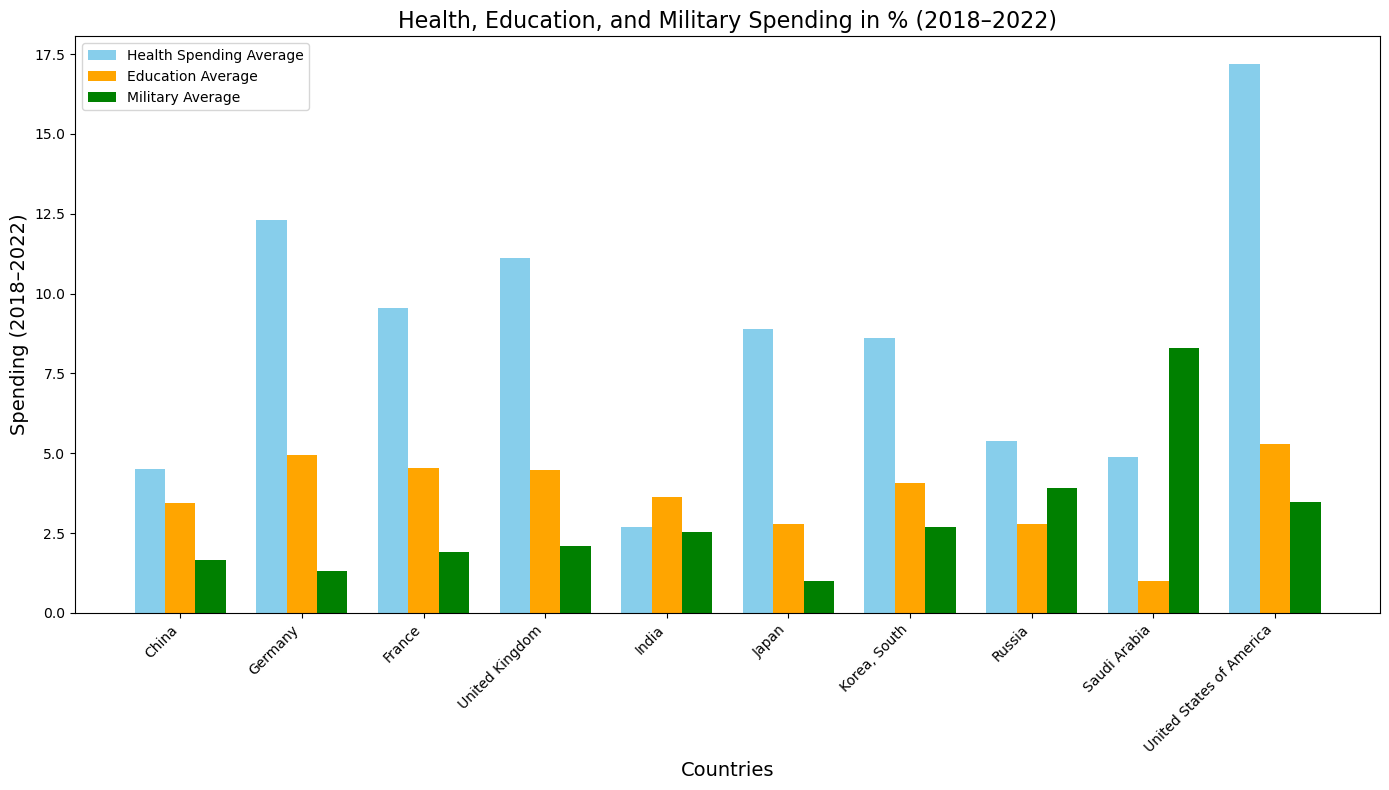

In [759]:
def plot_average_spending(health_spending_average, education_average, military_average):
    # Set up the data for plotting
    countries = health_spending_average["Country Name"]  # Assuming all datasets have the same countries
    x = np.arange(len(countries))
    bar_width = 0.25

    # Create the plot
    plt.figure(figsize=(14, 8))

    plt.bar(x - bar_width, health_spending_average["Average Spending"], width=bar_width, label="Health Spending Average", color="skyblue")

    plt.bar(x, education_average["Average Spending"], width=bar_width, label="Education Average", color="orange")

    plt.bar(x + bar_width, military_average["Average Spending"], width=bar_width, label="Military Average", color="green")

    # Add labels, title, and legend
    plt.xlabel("Countries", fontsize=14)
    plt.ylabel("Spending (2018–2022)", fontsize=14)
    plt.title("Health, Education, and Military Spending in % (2018–2022)", fontsize=16)
    plt.xticks(x, countries, rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()

    
    # Save the plot 
    plt.savefig("average_spending_plot.png", dpi=300)
    
    # Show the plot
    plt.show()


plot_average_spending(health_spending_average, education_average, military_average)


## Compare Education, Health and Military Spending in absolute

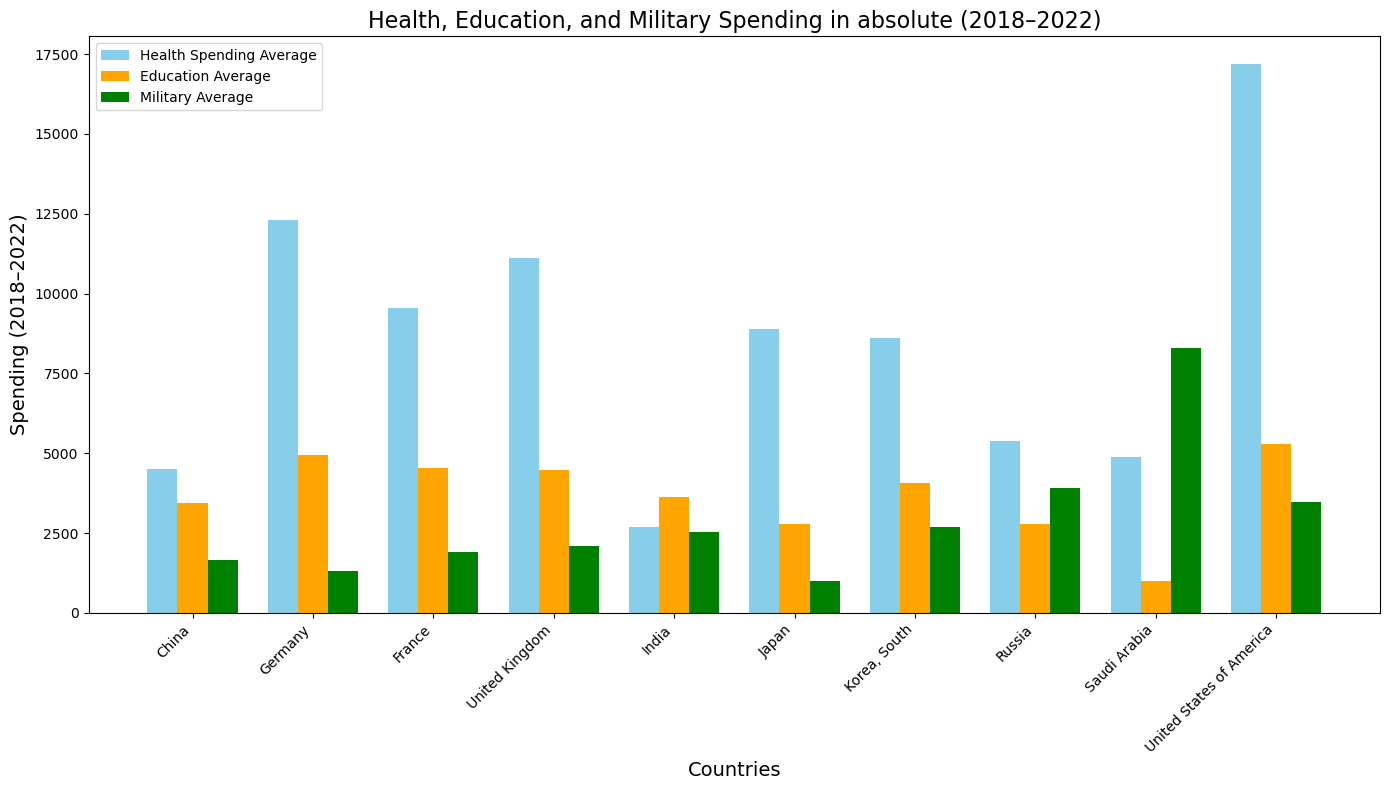

In [760]:
def plot_absolute_spending(health_spending_average, education_average, military_average):
    # Set up the data for plotting
    countries = health_spending_average["Country Name"]  # Assuming all datasets have the same countries
    x = np.arange(len(countries))
    bar_width = 0.25

    # Create the plot
    plt.figure(figsize=(14, 8))

    plt.bar(x - bar_width, health_spending_average["Average Spending"] * 1000, width=bar_width, label="Health Spending Average", color="skyblue")

    plt.bar(x, education_average["Average Spending"] * 1000, width=bar_width, label="Education Average", color="orange")

    plt.bar(x + bar_width, military_average["Average Spending"] * 1000, width=bar_width, label="Military Average", color="green")

    # Add labels, title, and legend
    plt.xlabel("Countries", fontsize=14)
    plt.ylabel("Spending (2018–2022)", fontsize=14)
    plt.title("Health, Education, and Military Spending in absolute (2018–2022)", fontsize=16)
    plt.xticks(x, countries, rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()

    
    # Save the plot 
    plt.savefig("absolute_spending_plot.png", dpi=300)
    
    # Show the plot
    plt.show()


plot_absolute_spending(health_spending_average, education_average, military_average)


## Compare military data to that countries gdp

In [761]:
military_GDP

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,0.0330,0.0341,0.0365,0.0342,0.0334
China,0.0167,0.0168,0.0176,0.0161,0.0162
Russia,0.0372,0.0386,0.0417,0.0361,0.0469
India,0.0242,0.0255,0.0281,0.0248,0.0236
Saudi Arabia,0.0881,0.0779,0.0879,0.0723,0.0640
United Kingdom,0.0194,0.0199,0.0216,0.0207,0.0207
Germany,0.0117,0.0126,0.0137,0.0132,0.0138
France,0.0184,0.0184,0.0200,0.0191,0.0193
Japan,0.0096,0.0099,0.0102,0.0102,0.0111


In [764]:
military_GDP

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,0.0330,0.0341,0.0365,0.0342,0.0334
China,0.0167,0.0168,0.0176,0.0161,0.0162
Russia,0.0372,0.0386,0.0417,0.0361,0.0469
India,0.0242,0.0255,0.0281,0.0248,0.0236
Saudi Arabia,0.0881,0.0779,0.0879,0.0723,0.0640
United Kingdom,0.0194,0.0199,0.0216,0.0207,0.0207
Germany,0.0117,0.0126,0.0137,0.0132,0.0138
France,0.0184,0.0184,0.0200,0.0191,0.0193
Japan,0.0096,0.0099,0.0102,0.0102,0.0111


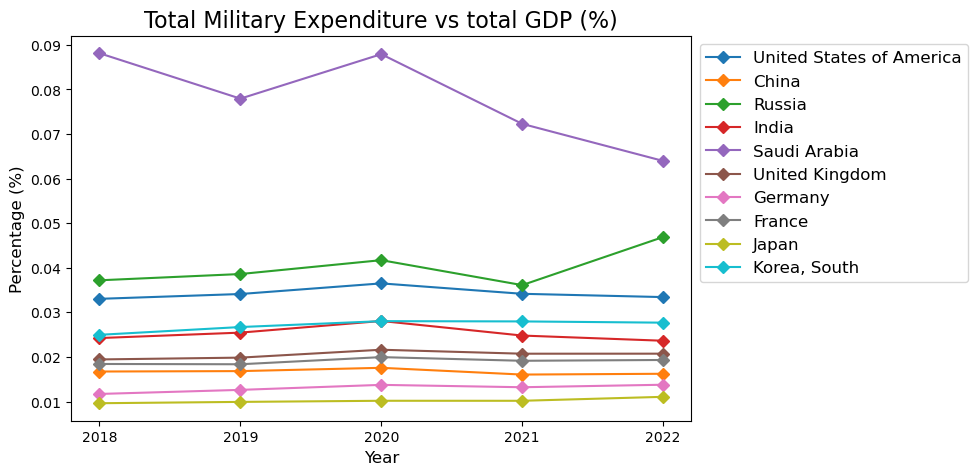

In [765]:
def plot_military_expenditure_vs_gdp_percent(military_GDP, countries, save_path=None):

    # Create a figure of size 8x5
    plt.figure(figsize=(8, 5))

    # Loop through each country and plot its data
    for country in countries:
        plt.plot(military_GDP.loc[country, :], marker="D", label=country)

    # Set legend location and fontsize
    plt.legend(bbox_to_anchor=(1, 1), fontsize=12)

    # Set the title and axis labels
    plt.title("Total Military Expenditure vs total GDP (%)", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)

    # Convert the columns (years) to integers if necessary
    years = military_GDP.columns.astype(int)  # Assuming the columns represent the years

    # Set the x-axis ticks to the actual years (ensuring they are integers)
    plt.xticks(years)

    # Optionally, save the plot to a file
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Display the plot
    plt.show()

plot_military_expenditure_vs_gdp_percent(military_GDP, country, save_path="military_spending_gdp.png")


## Educational data vs countries gdp

In [766]:
military_GDP

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,0.0330,0.0341,0.0365,0.0342,0.0334
China,0.0167,0.0168,0.0176,0.0161,0.0162
Russia,0.0372,0.0386,0.0417,0.0361,0.0469
India,0.0242,0.0255,0.0281,0.0248,0.0236
Saudi Arabia,0.0881,0.0779,0.0879,0.0723,0.0640
United Kingdom,0.0194,0.0199,0.0216,0.0207,0.0207
Germany,0.0117,0.0126,0.0137,0.0132,0.0138
France,0.0184,0.0184,0.0200,0.0191,0.0193
Japan,0.0096,0.0099,0.0102,0.0102,0.0111


In [767]:
education_spending

,Country Name,2018,2019,2020,2021,2022
40,China,3.5425,3.5411,3.5730,3.2978,3.2984
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439
77,France,5.4072,5.3544,5.6778,5.2400,1.0000
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,1.0000
109,India,4.3770,3.8970,4.2930,4.6350,1.0000
119,Japan,3.0778,3.1553,3.3063,3.4600,1.0000
126,"Korea, South",4.4581,4.6847,4.8017,5.4000,1.0000
202,Russia,4.6782,3.5093,3.7015,1.0000,1.0000
205,Saudi Arabia,1.0000,1.0000,1.0000,1.0000,1.0000
251,United States of America,4.9289,4.9873,5.4354,5.5900,5.4400


In [768]:
# Reset the index to include Country as a column
military_GDP = military_GDP.reset_index()

# Verify the columns now
print(military_GDP.columns)
print(military_GDP.head())

Index(['Country', 2018, 2019, 2020, 2021, 2022], dtype='object')
                    Country   2018   2019   2020   2021   2022
0  United States of America 0.0330 0.0341 0.0365 0.0342 0.0334
1                     China 0.0167 0.0168 0.0176 0.0161 0.0162
2                    Russia 0.0372 0.0386 0.0417 0.0361 0.0469
3                     India 0.0242 0.0255 0.0281 0.0248 0.0236
4              Saudi Arabia 0.0881 0.0779 0.0879 0.0723 0.0640


In [769]:
print(military_GDP.columns)
print(education_spending.columns)

Index(['Country', 2018, 2019, 2020, 2021, 2022], dtype='object')
Index(['Country Name', '2018', '2019', '2020', '2021', '2022'], dtype='object')


In [770]:
# Ensure year columns are strings in the DataFrame
education_spending.columns = education_spending.columns.astype(str)
military_GDP.columns = military_GDP.columns.astype(str)

# Stack the Education and GDP datasets
stack_education = education_spending.set_index("Country Name")[["2018", "2019", "2020", "2021", "2022"]].stack()
stack_gdp = military_GDP.set_index("Country")[["2018", "2019", "2020", "2021", "2022"]].stack()

# Combine the stacked DataFrames
countries_education_gdp = pd.concat([stack_education, stack_gdp], axis=1)

# Rename the columns
countries_education_gdp.columns = ["Education Spending", "GDP"]

# Reset index to create a proper DataFrame
countries_education_gdp = countries_education_gdp.reset_index()

# Rename the index columns for clarity
countries_education_gdp.columns = ["Country", "Year", "Education Spending", "GDP"]

# Display the formatted DataFrame
countries_education_gdp.head()

,Country,Year,Education Spending,GDP
0,China,2018,3.5425,0.0167
1,China,2019,3.5411,0.0168
2,China,2020,3.5730,0.0176
3,China,2021,3.2978,0.0161
4,China,2022,3.2984,0.0162


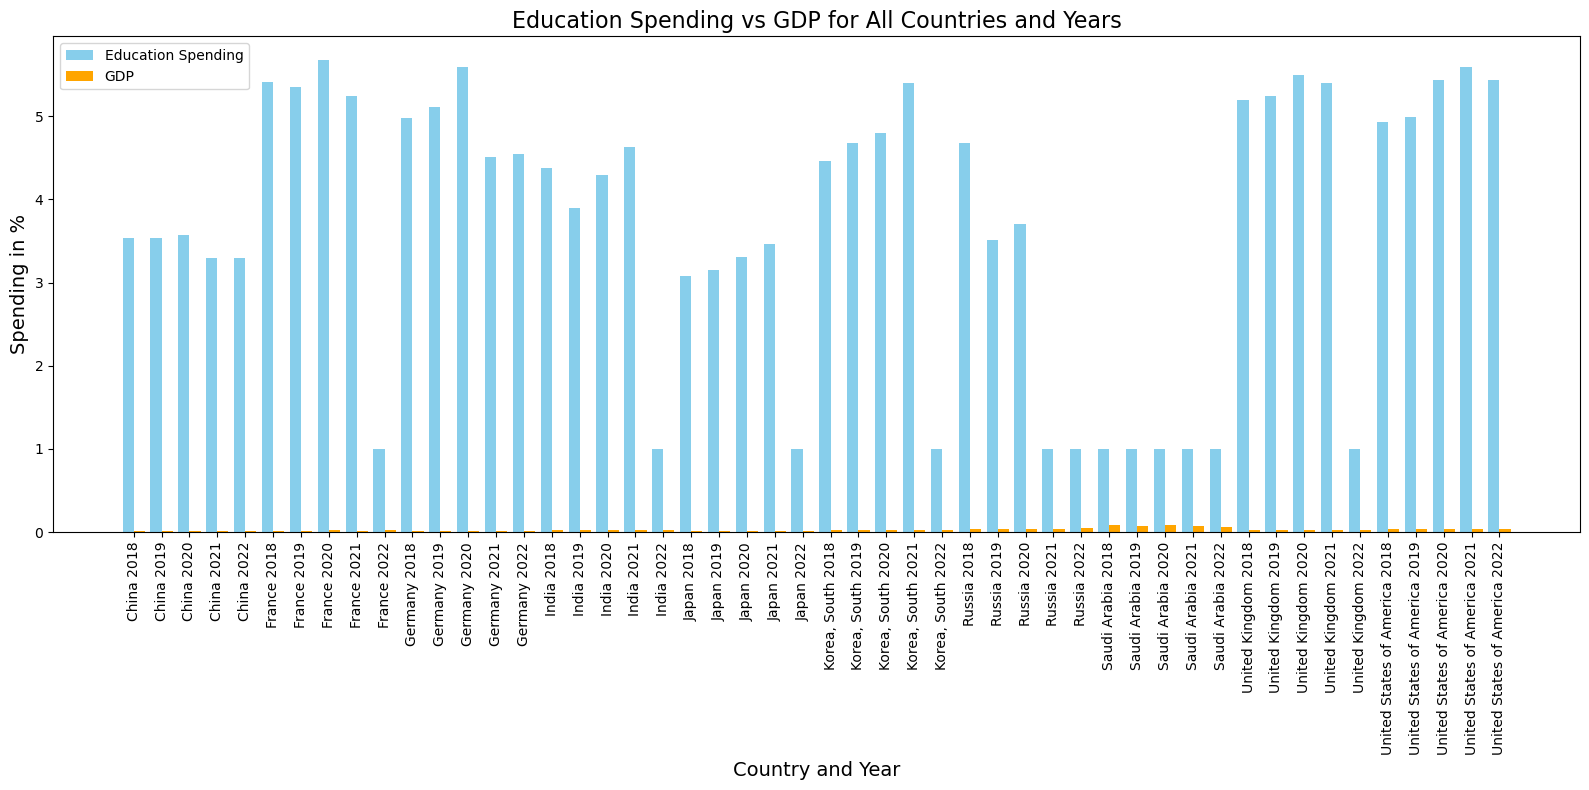

In [771]:
def plot_education_vs_gdp(countries_education_gdp):
    
    # Ensure the data is sorted by Country and Year
    countries_education_gdp = countries_education_gdp.sort_values(by=["Country", "Year"])

    # Prepare data for plotting
    countries_years = countries_education_gdp["Country"] + " " + countries_education_gdp["Year"]
    x = np.arange(len(countries_years))  # X positions for bars
    bar_width = 0.4  # Width of each bar

    # Plot the grouped bar chart
    plt.figure(figsize=(16, 8))
    plt.bar(x - bar_width / 2, countries_education_gdp["Education Spending"], width=bar_width, label="Education Spending", color="skyblue")
    plt.bar(x + bar_width / 2, countries_education_gdp["GDP"], width=bar_width, label="GDP", color="orange")

    # Add labels, title, and legend
    plt.xlabel("Country and Year", fontsize=14)
    plt.ylabel("Spending in %", fontsize=14)
    plt.title("Education Spending vs GDP for All Countries and Years", fontsize=16)
    plt.xticks(x, countries_years, rotation=90, fontsize=10)  # Rotate x-ticks for readability
    plt.legend()
    plt.tight_layout()

    # save plot
    plt.savefig("education_gdp_spending_plot.png", dpi=300)
    # Show the plot
    plt.show()

plot_education_vs_gdp(countries_education_gdp)

## Health spending vs countries gdp

In [772]:
military_GDP

,Country,2018,2019,2020,2021,2022
0,United States of America,0.0330,0.0341,0.0365,0.0342,0.0334
1,China,0.0167,0.0168,0.0176,0.0161,0.0162
2,Russia,0.0372,0.0386,0.0417,0.0361,0.0469
3,India,0.0242,0.0255,0.0281,0.0248,0.0236
4,Saudi Arabia,0.0881,0.0779,0.0879,0.0723,0.0640
5,United Kingdom,0.0194,0.0199,0.0216,0.0207,0.0207
6,Germany,0.0117,0.0126,0.0137,0.0132,0.0138
7,France,0.0184,0.0184,0.0200,0.0191,0.0193
8,Japan,0.0096,0.0099,0.0102,0.0102,0.0111
9,"Korea, South",0.0250,0.0267,0.0280,0.0280,0.0277


In [773]:
health_spending

,Country Name,2018,2019,2020,2021,2022
40,China,5.1679,5.3503,5.5936,5.3836,1.0000
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547
77,France,11.2080,11.0889,12.1310,12.3079,1.0000
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445
109,India,2.8600,2.9500,3.3400,3.2800,1.0000
119,Japan,10.7400,10.9700,11.0000,10.8200,1.0000
126,"Korea, South",7.4912,8.1748,8.3498,9.3315,9.7205
202,Russia,5.3600,5.6500,7.5700,7.3900,1.0000
205,Saudi Arabia,5.3406,5.4674,6.6463,5.9684,1.0000
251,United States of America,16.6296,16.6658,18.7562,17.3626,16.5712


In [774]:
print(military_GDP.columns)
print(health_spending.columns)

Index(['Country', '2018', '2019', '2020', '2021', '2022'], dtype='object')
Index(['Country Name', '2018', '2019', '2020', '2021', '2022'], dtype='object')


In [775]:
# Ensure year columns are strings in the DataFrame
health_spending.columns = education_spending.columns.astype(str)
military_GDP.columns = military_GDP.columns.astype(str)

# Stack the Education and GDP datasets
stack_health = education_spending.set_index("Country Name")[["2018", "2019", "2020", "2021", "2022"]].stack()
stack_gdp = military_GDP.set_index("Country")[["2018", "2019", "2020", "2021", "2022"]].stack()

# Combine the stacked DataFrames
countries_health_gdp = pd.concat([stack_health, stack_gdp], axis=1)

# Rename the columns
countries_health_gdp.columns = ["Health Spending", "GDP"]

# Reset index to create a proper DataFrame
countries_health_gdp = countries_health_gdp.reset_index()

# Rename the index columns for clarity
countries_health_gdp.columns = ["Country", "Year", "Health Spending", "GDP"]

# Display the formatted DataFrame
countries_health_gdp.head()

,Country,Year,Health Spending,GDP
0,China,2018,3.5425,0.0167
1,China,2019,3.5411,0.0168
2,China,2020,3.5730,0.0176
3,China,2021,3.2978,0.0161
4,China,2022,3.2984,0.0162


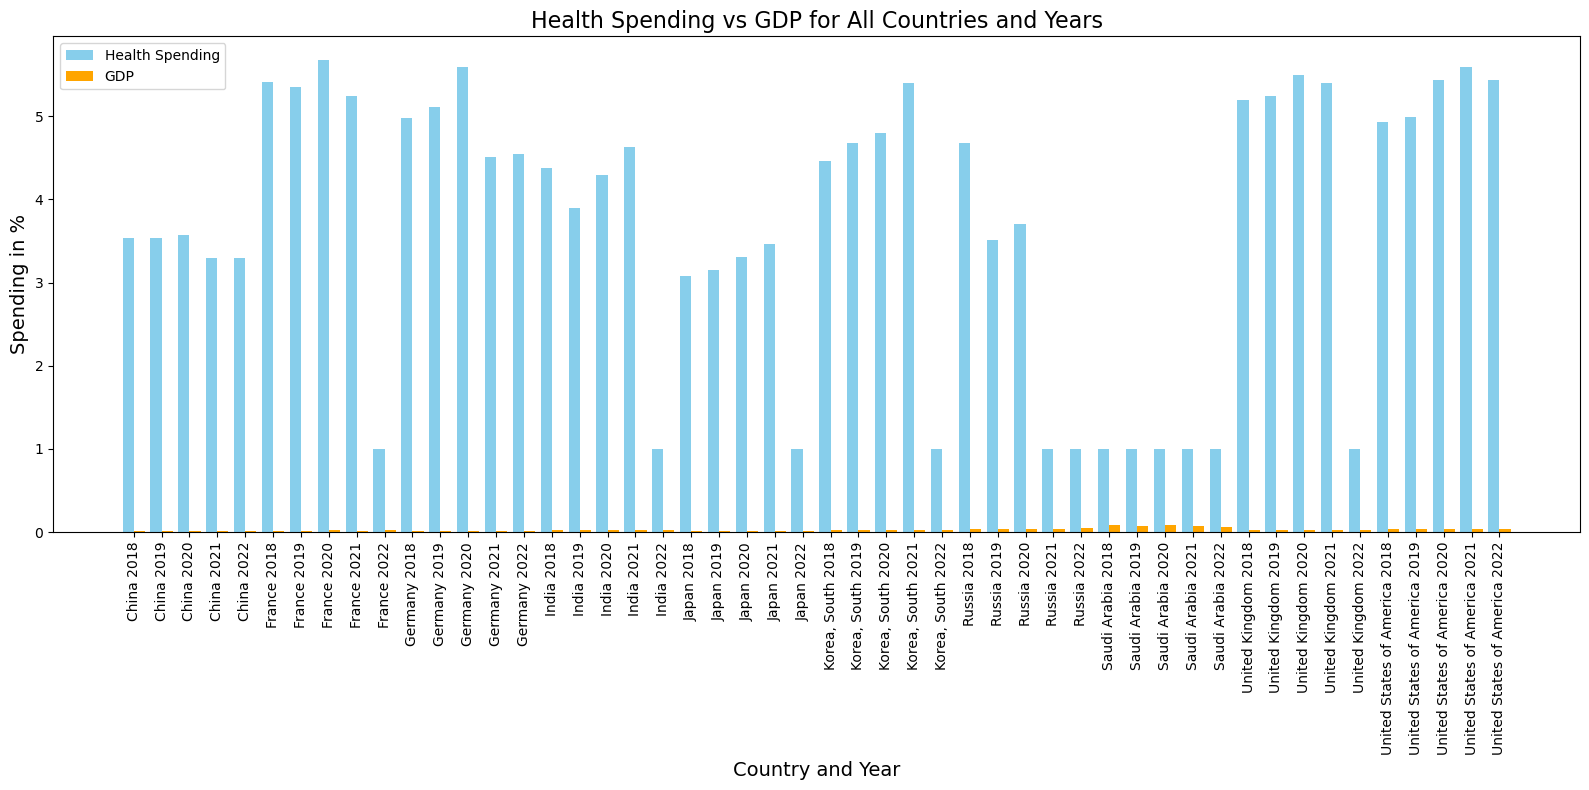

In [776]:
def plot_health_spending_vs_gdp(countries_health_spending_gdp):
    
    # Ensure the data is sorted by Country and Year
    countries_health_spending_gdp = countries_health_spending_gdp.sort_values(by=["Country", "Year"])

    # Prepare data for plotting
    countries_years = countries_health_spending_gdp["Country"] + " " + countries_health_spending_gdp["Year"]
    x = np.arange(len(countries_years))  # X positions for bars
    bar_width = 0.4  # Width of each bar

    # Plot the grouped bar chart
    plt.figure(figsize=(16, 8))
    plt.bar(x - bar_width / 2, countries_health_spending_gdp["Health Spending"], width=bar_width, label="Health Spending", color="skyblue")
    plt.bar(x + bar_width / 2, countries_health_spending_gdp["GDP"], width=bar_width, label="GDP", color="orange")

    # Add labels, title, and legend
    plt.xlabel("Country and Year", fontsize=14)
    plt.ylabel("Spending in %", fontsize=14)
    plt.title("Health Spending vs GDP for All Countries and Years", fontsize=16)
    plt.xticks(x, countries_years, rotation=90, fontsize=10)  # Rotate x-ticks for readability
    plt.legend()
    plt.tight_layout()

    # save plot
    plt.savefig("health_gdp_spending_plot.png", dpi=300)
    
    # Show the plot
    plt.show()

plot_health_spending_vs_gdp(countries_health_gdp)


## Per person education to per person gdp

In [777]:
education_spending

,Country Name,2018,2019,2020,2021,2022
40,China,3.5425,3.5411,3.5730,3.2978,3.2984
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439
77,France,5.4072,5.3544,5.6778,5.2400,1.0000
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,1.0000
109,India,4.3770,3.8970,4.2930,4.6350,1.0000
119,Japan,3.0778,3.1553,3.3063,3.4600,1.0000
126,"Korea, South",4.4581,4.6847,4.8017,5.4000,1.0000
202,Russia,4.6782,3.5093,3.7015,1.0000,1.0000
205,Saudi Arabia,1.0000,1.0000,1.0000,1.0000,1.0000
251,United States of America,4.9289,4.9873,5.4354,5.5900,5.4400


In [778]:
gdp_pc = gdp_pc.reset_index()
gdp_pc

,Country,2018,2019,2020,2021,2022
0,United States of America,6219219.4557,6437363.9028,6347211.5722,7001237.6335,7610070.7381
1,China,980489.8330,1004369.2175,1030585.3800,1249189.3307,1261473.8368
2,Russia,1137121.6823,1158901.4134,1015947.5118,1257602.0504,1508255.1562
3,India,199640.6769,202955.8874,186067.3075,218681.8976,238730.0629
4,Saudi Arabia,2417567.4986,2340594.2260,2039812.1325,2431588.6138,3044773.3253
5,United Kingdom,4322012.9346,4266893.8298,4023032.1481,4669649.3736,4576977.0439
6,Germany,4791847.6655,4677815.0146,4655976.7512,5128904.9222,4890874.3433
7,France,4339665.7120,4237737.9260,4097404.0869,4585370.3427,4294991.6451
8,Japan,3994032.5487,4068268.7076,4033306.8171,4020860.0087,3419993.9569
9,"Korea, South",3337997.2459,3186946.8763,3173088.2559,3508705.3578,3230931.1598


In [779]:
# Fix column alignment issues and ensure proper formatting
education_spending.columns = education_spending.columns.astype(str)
gdp_pc.columns = gdp_pc.columns.astype(str)

# Reshape both datasets to long format
education_spending_pc = education_spending.melt(id_vars=["Country Name"], var_name="Year", value_name="Education % of GDP")
gdp_per_capita = gdp_pc.melt(id_vars=["Country"], var_name="Year", value_name="GDP Per Capita")


In [780]:
education_spending_pc.head(10)

,Country Name,Year,Education % of GDP
0,China,2018,3.5425
1,Germany,2018,4.9793
2,France,2018,5.4072
3,United Kingdom,2018,5.1981
4,India,2018,4.3770
5,Japan,2018,3.0778
6,"Korea, South",2018,4.4581
7,Russia,2018,4.6782
8,Saudi Arabia,2018,1.0000
9,United States of America,2018,4.9289


In [781]:
gdp_per_capita.head(10)

,Country,Year,GDP Per Capita
0,United States of America,2018,6219219.4557
1,China,2018,980489.8330
2,Russia,2018,1137121.6823
3,India,2018,199640.6769
4,Saudi Arabia,2018,2417567.4986
5,United Kingdom,2018,4322012.9346
6,Germany,2018,4791847.6655
7,France,2018,4339665.7120
8,Japan,2018,3994032.5487
9,"Korea, South",2018,3337997.2459


In [782]:
# Ensure Year is numeric
education_spending_pc["Year"] = education_spending_pc["Year"].astype(int)
gdp_per_capita["Year"] = gdp_per_capita["Year"].astype(int)

# Merge datasets on Country and Year
merged_data_education = pd.merge(education_spending_pc, gdp_per_capita, left_on=["Country Name", "Year"], right_on=["Country", "Year"])

# Calculate Education Spending Per Person
merged_data_education["Education Spending Per Person"] = merged_data_education["GDP Per Capita"] * (merged_data_education["Education % of GDP"] / 100)

# Add a constant baseline for GDP Per Capita as 100%
merged_data_education["GDP Per Capita (%)"] = 100 - merged_data_education["Education % of GDP"]  # GDP per capita represents 100% in percentage composition

# Calculate Education Spending as % of GDP Per Person
merged_data_education["Education Spending as % of GDP Per Person"] = (
    (merged_data_education["Education Spending Per Person"] / merged_data_education["GDP Per Capita"]) * 100
)

In [783]:
merged_data_education.head()

,Country Name,Year,Education % of GDP,Country,GDP Per Capita,Education Spending Per Person,GDP Per Capita (%),Education Spending as % of GDP Per Person
0,China,2018,3.5425,China,980489.8330,34733.7988,96.4575,3.5425
1,Germany,2018,4.9793,Germany,4791847.6655,238601.9114,95.0207,4.9793
2,France,2018,5.4072,France,4339665.7120,234653.0946,94.5928,5.4072
3,United Kingdom,2018,5.1981,United Kingdom,4322012.9346,224661.2599,94.8019,5.1981
4,India,2018,4.3770,India,199640.6769,8738.2721,95.6230,4.3770


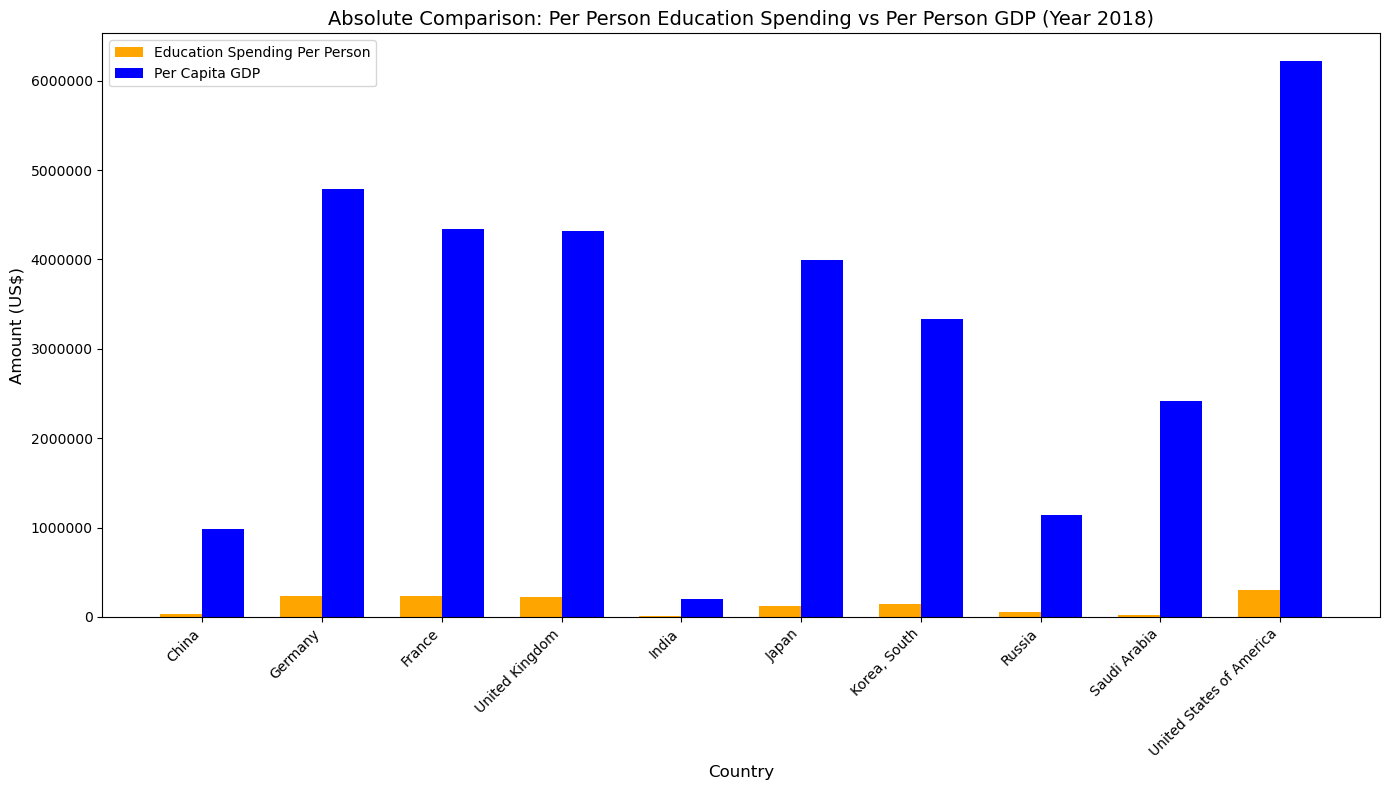

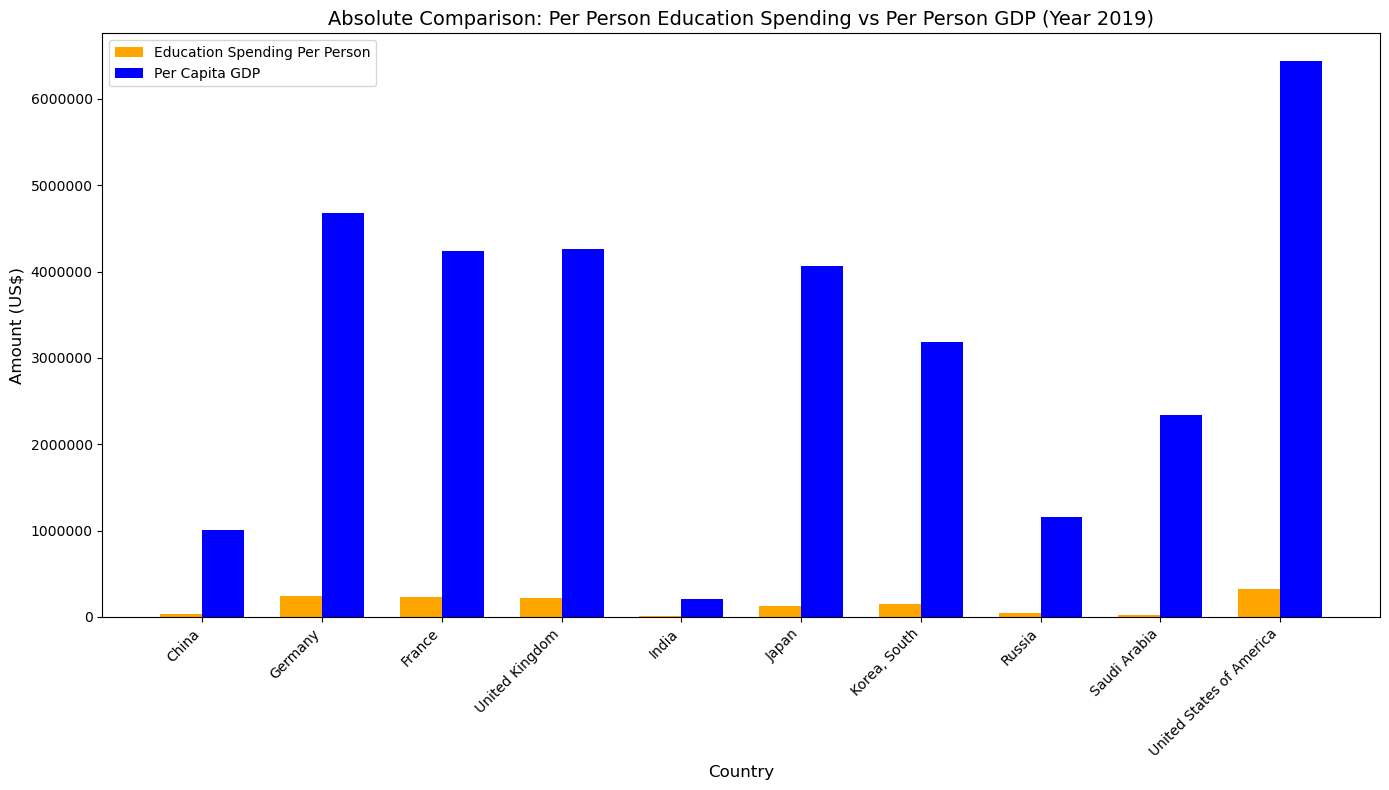

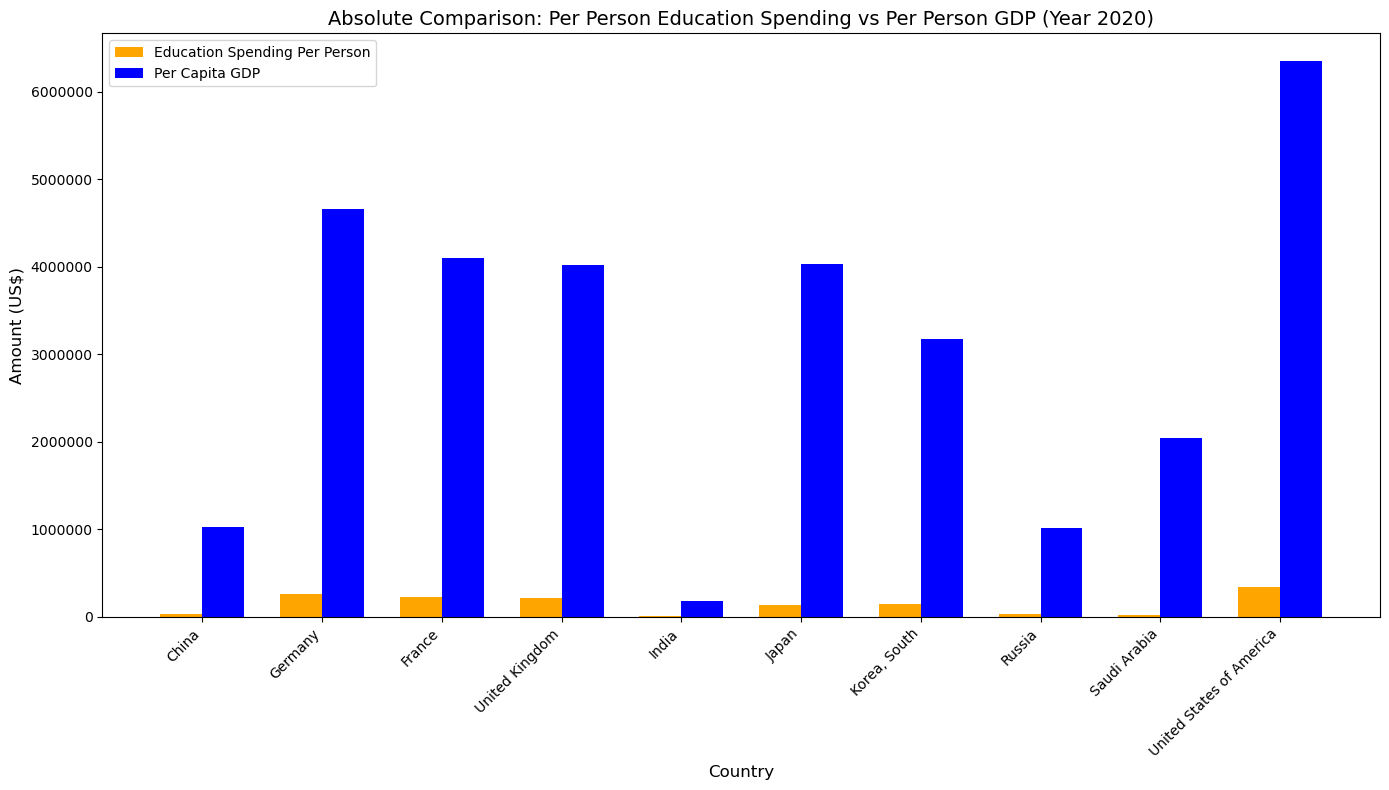

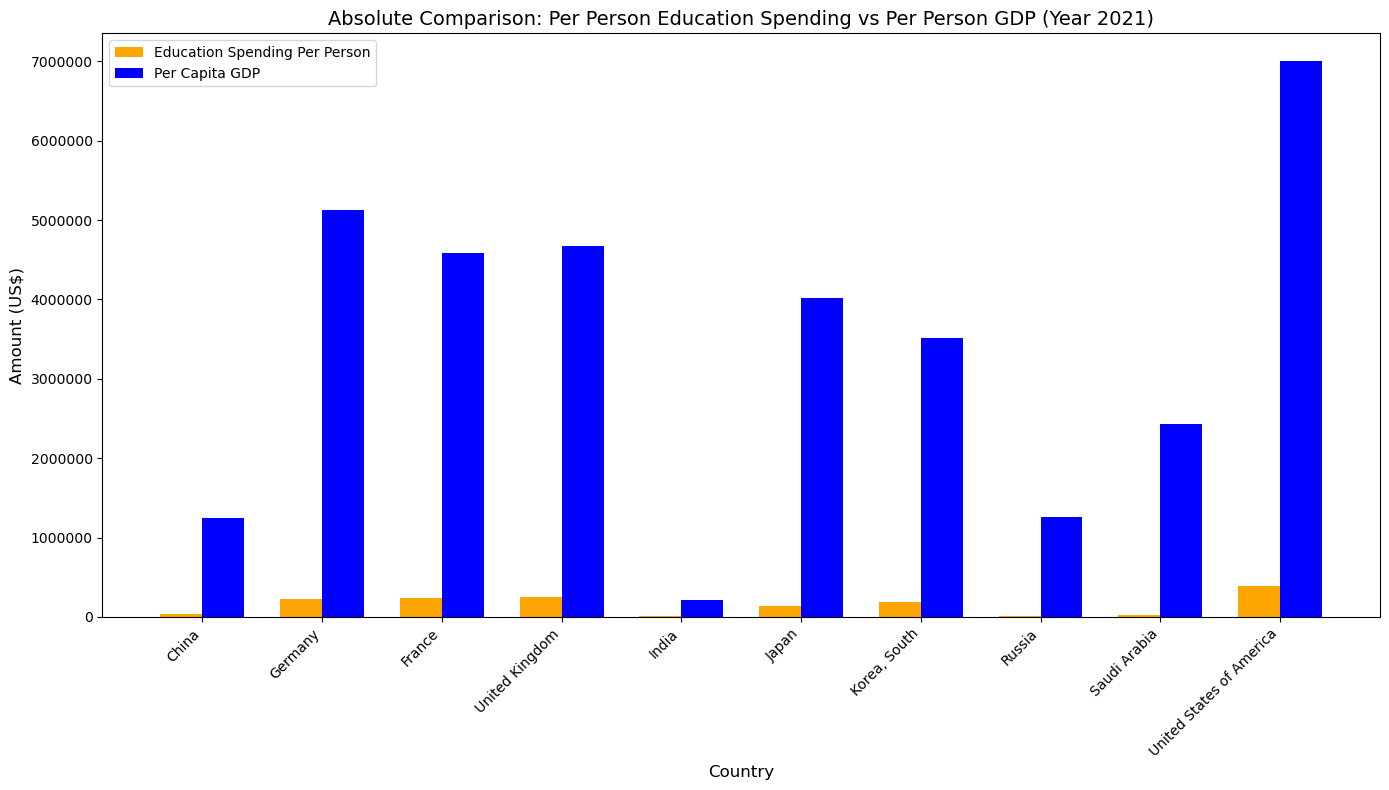

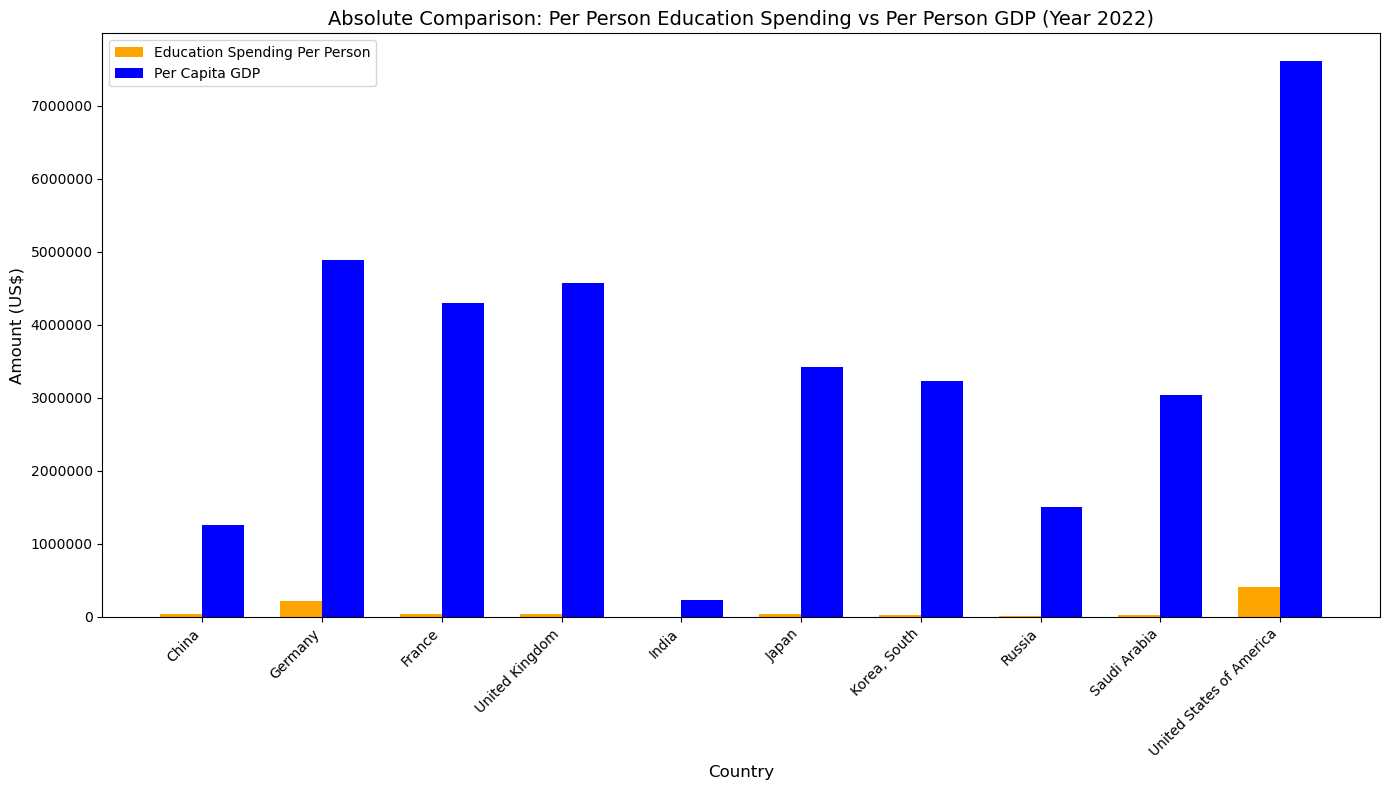

In [784]:
import matplotlib.pyplot as plt

def plot_education_vs_gdp_all_years(merged_data_education):
    # Get all unique years from the dataset
    unique_years = merged_data_education["Year"].unique()

    # Loop through each year and plot the chart
    for year in unique_years:
        # Filter data for the specified year
        year_data_education = merged_data_education[merged_data_education["Year"] == year]

        # Grouped Bar Chart for Absolute Values
        plt.figure(figsize=(14, 8))

        # Disable scientific notation for tick labels
        plt.ticklabel_format(style="plain", axis="y")

        bar_width = 0.35
        x = range(len(year_data_education["Country Name"]))

        # Plot Education Spending Per Person and GDP Per Capita
        plt.bar(x, year_data_education["Education Spending Per Person"], width=bar_width, label="Education Spending Per Person", color="orange")
        plt.bar([i + bar_width for i in x], year_data_education["GDP Per Capita"], width=bar_width, label="Per Capita GDP", color="blue")

        # Add labels and titles
        plt.xlabel("Country", fontsize=12)
        plt.ylabel("Amount (US$)", fontsize=12)
        plt.title(f"Absolute Comparison: Per Person Education Spending vs Per Person GDP (Year {year})", fontsize=14)
        plt.xticks([i + bar_width / 2 for i in x], year_data_education["Country Name"], rotation=45, ha="right")
        plt.legend()

        # Adjust layout and save the chart
        plt.tight_layout()

        # Save plot for the specific year
        plt.savefig(f"per_person_education_gdp_spending_abs_plot_{year}.png", dpi=300)

        plt.show()

# Call the function for all years
plot_education_vs_gdp_all_years(merged_data_education)


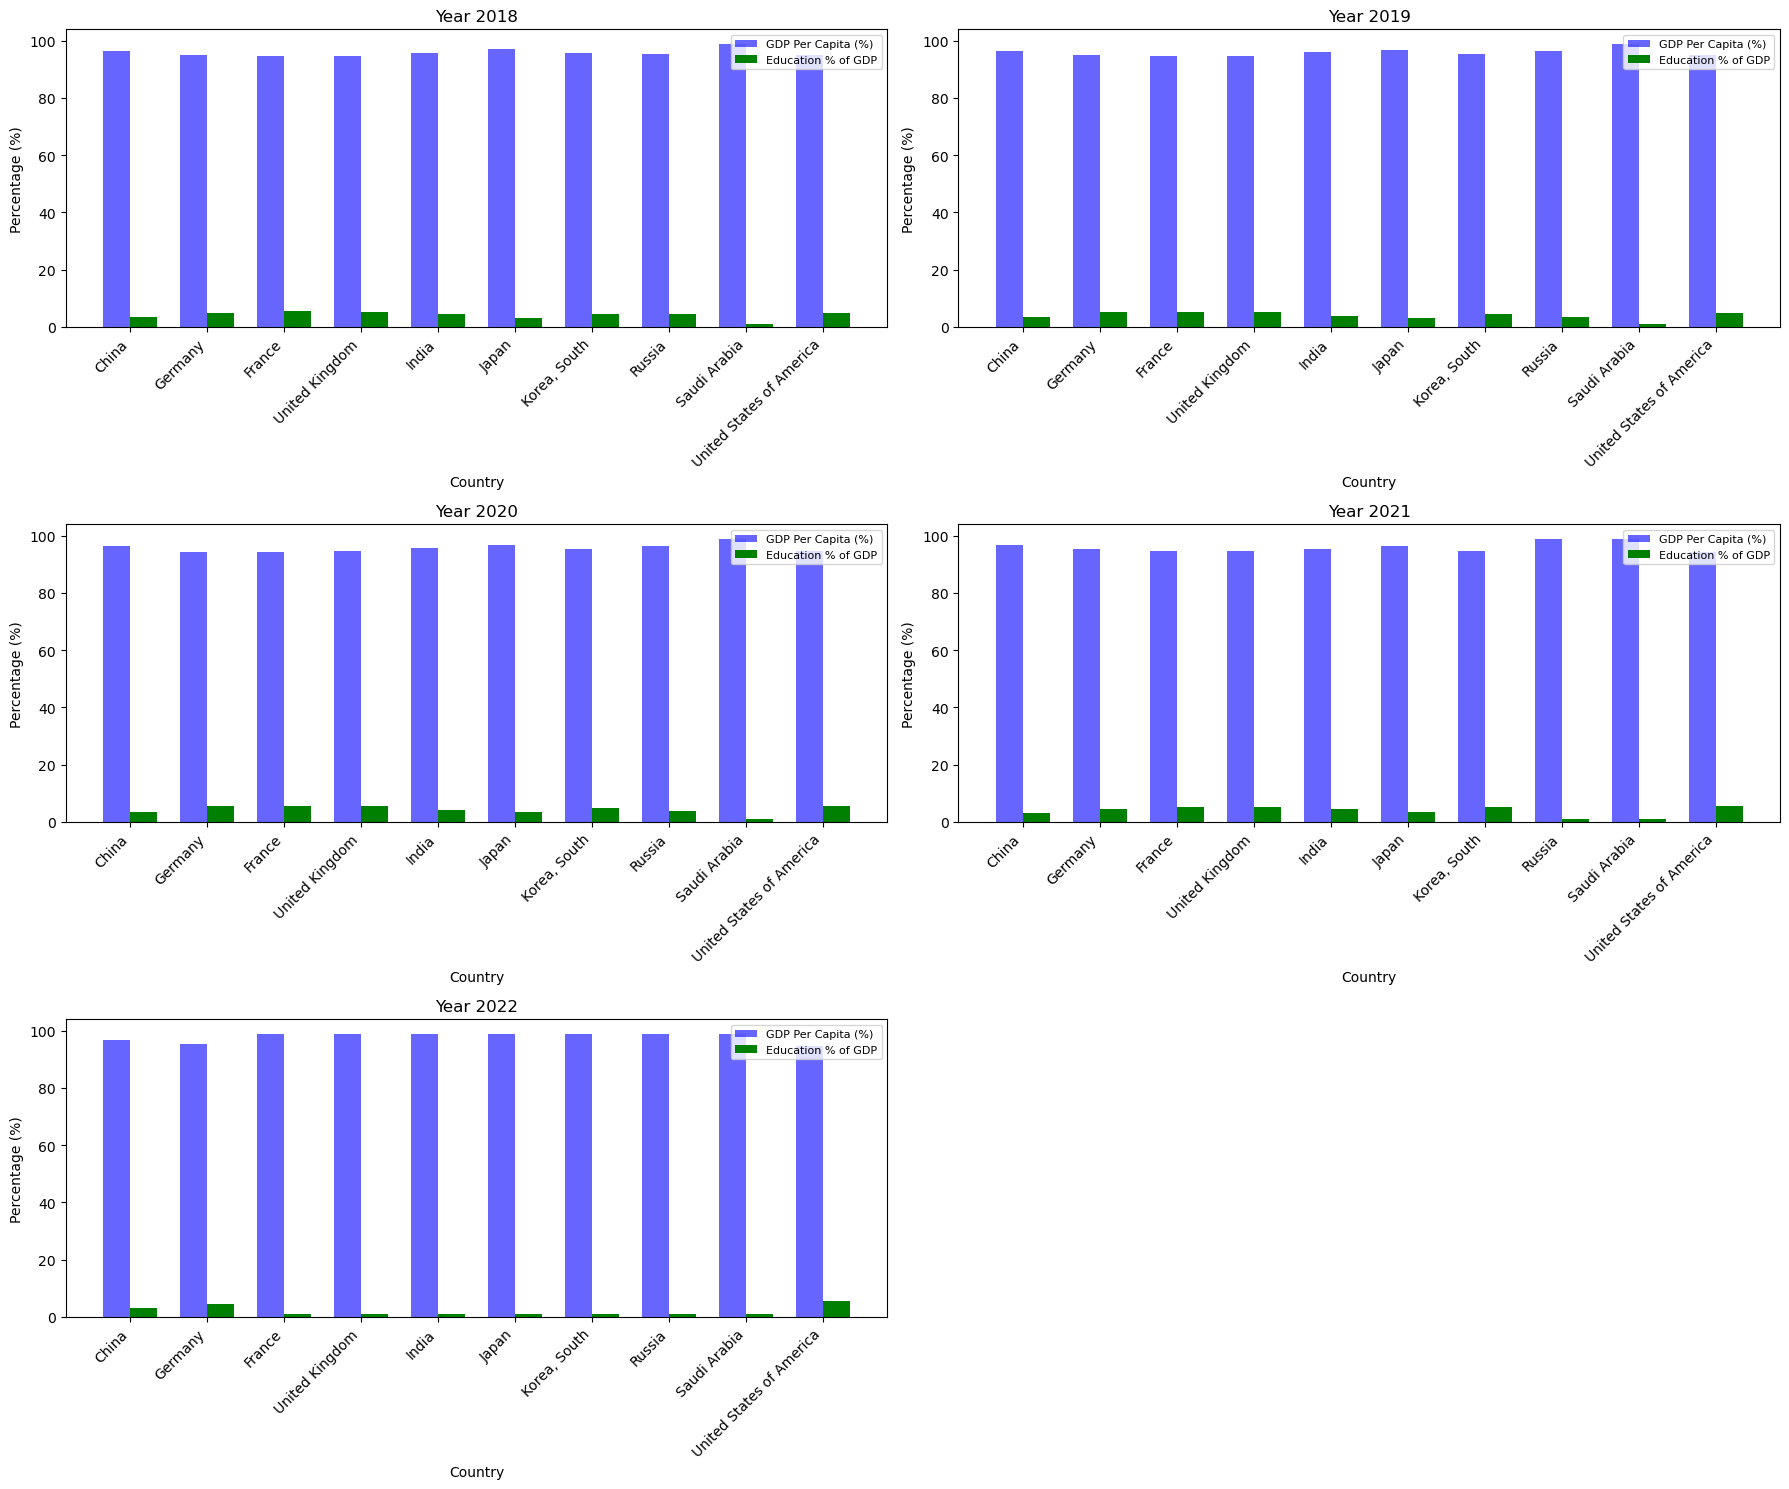

In [785]:
import matplotlib.pyplot as plt

def plot_education_spending_percentage_vs_gdp_all_years(merged_data_education):
    # Get all unique years from the dataset
    unique_years = merged_data_education["Year"].unique()
    num_years = len(unique_years)

    # Set up the figure for multiple subplots with sufficient size
    fig, axes = plt.subplots(nrows=(num_years + 1) // 2, ncols=2, figsize=(18, num_years * 3))

    # Flatten axes array for easier indexing (handles single-row cases)
    axes = axes.flatten()

    # Loop through each year and plot the chart
    for idx, year in enumerate(unique_years):
        # Filter data for the specified year
        year_data_education = merged_data_education[merged_data_education["Year"] == year]

        # Grouped Bar Chart for Percentage Values
        ax = axes[idx]
        bar_width = 0.35
        x = range(len(year_data_education["Country Name"]))

        # Plot GDP Per Capita and Education Spending as % of GDP
        ax.bar(x, year_data_education["GDP Per Capita (%)"], width=bar_width, label="GDP Per Capita (%)", color="blue", alpha=0.6)
        ax.bar([i + bar_width for i in x], year_data_education["Education % of GDP"], width=bar_width, label="Education % of GDP", color="green")

        # Add labels and titles for each subplot
        ax.set_xlabel("Country", fontsize=10)
        ax.set_ylabel("Percentage (%)", fontsize=10)
        ax.set_title(f"Year {year}", fontsize=12)
        ax.set_xticks([i + bar_width / 2 for i in x])
        ax.set_xticklabels(year_data_education["Country Name"], rotation=45, ha="right")
        ax.legend(fontsize=8)

    # Remove any unused subplots
    for idx in range(num_years, len(axes)):
        fig.delaxes(axes[idx])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the combined plot
    plt.savefig("education_spending_vs_gdp_percentage_all_years_plot.png", dpi=300)

    # Show the plot
    plt.show()

# Call the function for all years
plot_education_spending_percentage_vs_gdp_all_years(merged_data_education)


## Per person health to per person gdp in percentage

In [786]:
health_spending

,Country Name,2018,2019,2020,2021,2022
40,China,5.1679,5.3503,5.5936,5.3836,1.0000
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547
77,France,11.2080,11.0889,12.1310,12.3079,1.0000
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445
109,India,2.8600,2.9500,3.3400,3.2800,1.0000
119,Japan,10.7400,10.9700,11.0000,10.8200,1.0000
126,"Korea, South",7.4912,8.1748,8.3498,9.3315,9.7205
202,Russia,5.3600,5.6500,7.5700,7.3900,1.0000
205,Saudi Arabia,5.3406,5.4674,6.6463,5.9684,1.0000
251,United States of America,16.6296,16.6658,18.7562,17.3626,16.5712


In [787]:
gdp_pc

,Country,2018,2019,2020,2021,2022
0,United States of America,6219219.4557,6437363.9028,6347211.5722,7001237.6335,7610070.7381
1,China,980489.8330,1004369.2175,1030585.3800,1249189.3307,1261473.8368
2,Russia,1137121.6823,1158901.4134,1015947.5118,1257602.0504,1508255.1562
3,India,199640.6769,202955.8874,186067.3075,218681.8976,238730.0629
4,Saudi Arabia,2417567.4986,2340594.2260,2039812.1325,2431588.6138,3044773.3253
5,United Kingdom,4322012.9346,4266893.8298,4023032.1481,4669649.3736,4576977.0439
6,Germany,4791847.6655,4677815.0146,4655976.7512,5128904.9222,4890874.3433
7,France,4339665.7120,4237737.9260,4097404.0869,4585370.3427,4294991.6451
8,Japan,3994032.5487,4068268.7076,4033306.8171,4020860.0087,3419993.9569
9,"Korea, South",3337997.2459,3186946.8763,3173088.2559,3508705.3578,3230931.1598


In [788]:
# Fix column alignment issues and ensure proper formatting
health_spending.columns = health_spending.columns.astype(str)
gdp_pc.columns = gdp_pc.columns.astype(str)

# Reshape both datasets to long format
health_spending_pc = health_spending.melt(id_vars=["Country Name"], var_name="Year", value_name="Health % of GDP")
gdp_per_capita = gdp_pc.melt(id_vars=["Country"], var_name="Year", value_name="GDP Per Capita")

In [789]:
health_spending_pc.head()

,Country Name,Year,Health % of GDP
0,China,2018,5.1679
1,Germany,2018,11.4805
2,France,2018,11.2080
3,United Kingdom,2018,9.7308
4,India,2018,2.8600


In [790]:
gdp_per_capita.head()

,Country,Year,GDP Per Capita
0,United States of America,2018,6219219.4557
1,China,2018,980489.8330
2,Russia,2018,1137121.6823
3,India,2018,199640.6769
4,Saudi Arabia,2018,2417567.4986


In [791]:
# Ensure Year is numeric
health_spending_pc["Year"] = health_spending_pc["Year"].astype(int)
gdp_per_capita["Year"] = gdp_per_capita["Year"].astype(int)

# Merge datasets on Country and Year
merged_data_health = pd.merge(health_spending_pc, gdp_per_capita, left_on=["Country Name", "Year"], right_on=["Country", "Year"])

# Calculate Health Spending Per Person
merged_data_health["Health Spending Per Person"] = merged_data_health["GDP Per Capita"] * (merged_data_health["Health % of GDP"] / 100)

# Add a constant baseline for GDP Per Capita as 100%
merged_data_health["GDP Per Capita (%)"] = 100 - merged_data_health["Health % of GDP"]  # GDP per capita represents 100% in percentage composition

# Fix column alignment issues and ensure proper formatting
health_spending.columns = health_spending.columns.astype(str)
gdp_pc.columns = gdp_pc.columns.astype(str)

# Reshape both datasets to long format
health_spending_pc = health_spending.melt(id_vars=["Country Name"], var_name="Year", value_name="Health % of GDP")
gdp_per_capita = gdp_pc.melt(id_vars=["Country"], var_name="Year", value_name="GDP Per Capita")

# Calculate Health Spending as % of GDP Per Person
merged_data_health["Health Spending as % of GDP Per Person"] = (
    (merged_data_health["Health Spending Per Person"] / merged_data_health["GDP Per Capita"]) * 100
)

In [792]:
merged_data_health.head()

,Country Name,Year,Health % of GDP,Country,GDP Per Capita,Health Spending Per Person,GDP Per Capita (%),Health Spending as % of GDP Per Person
0,China,2018,5.1679,China,980489.8330,50670.7816,94.8321,5.1679
1,Germany,2018,11.4805,Germany,4791847.6655,550128.8130,88.5195,11.4805
2,France,2018,11.2080,France,4339665.7120,486389.2856,88.7920,11.2080
3,United Kingdom,2018,9.7308,United Kingdom,4322012.9346,420566.3383,90.2692,9.7308
4,India,2018,2.8600,India,199640.6769,5709.7234,97.1400,2.8600


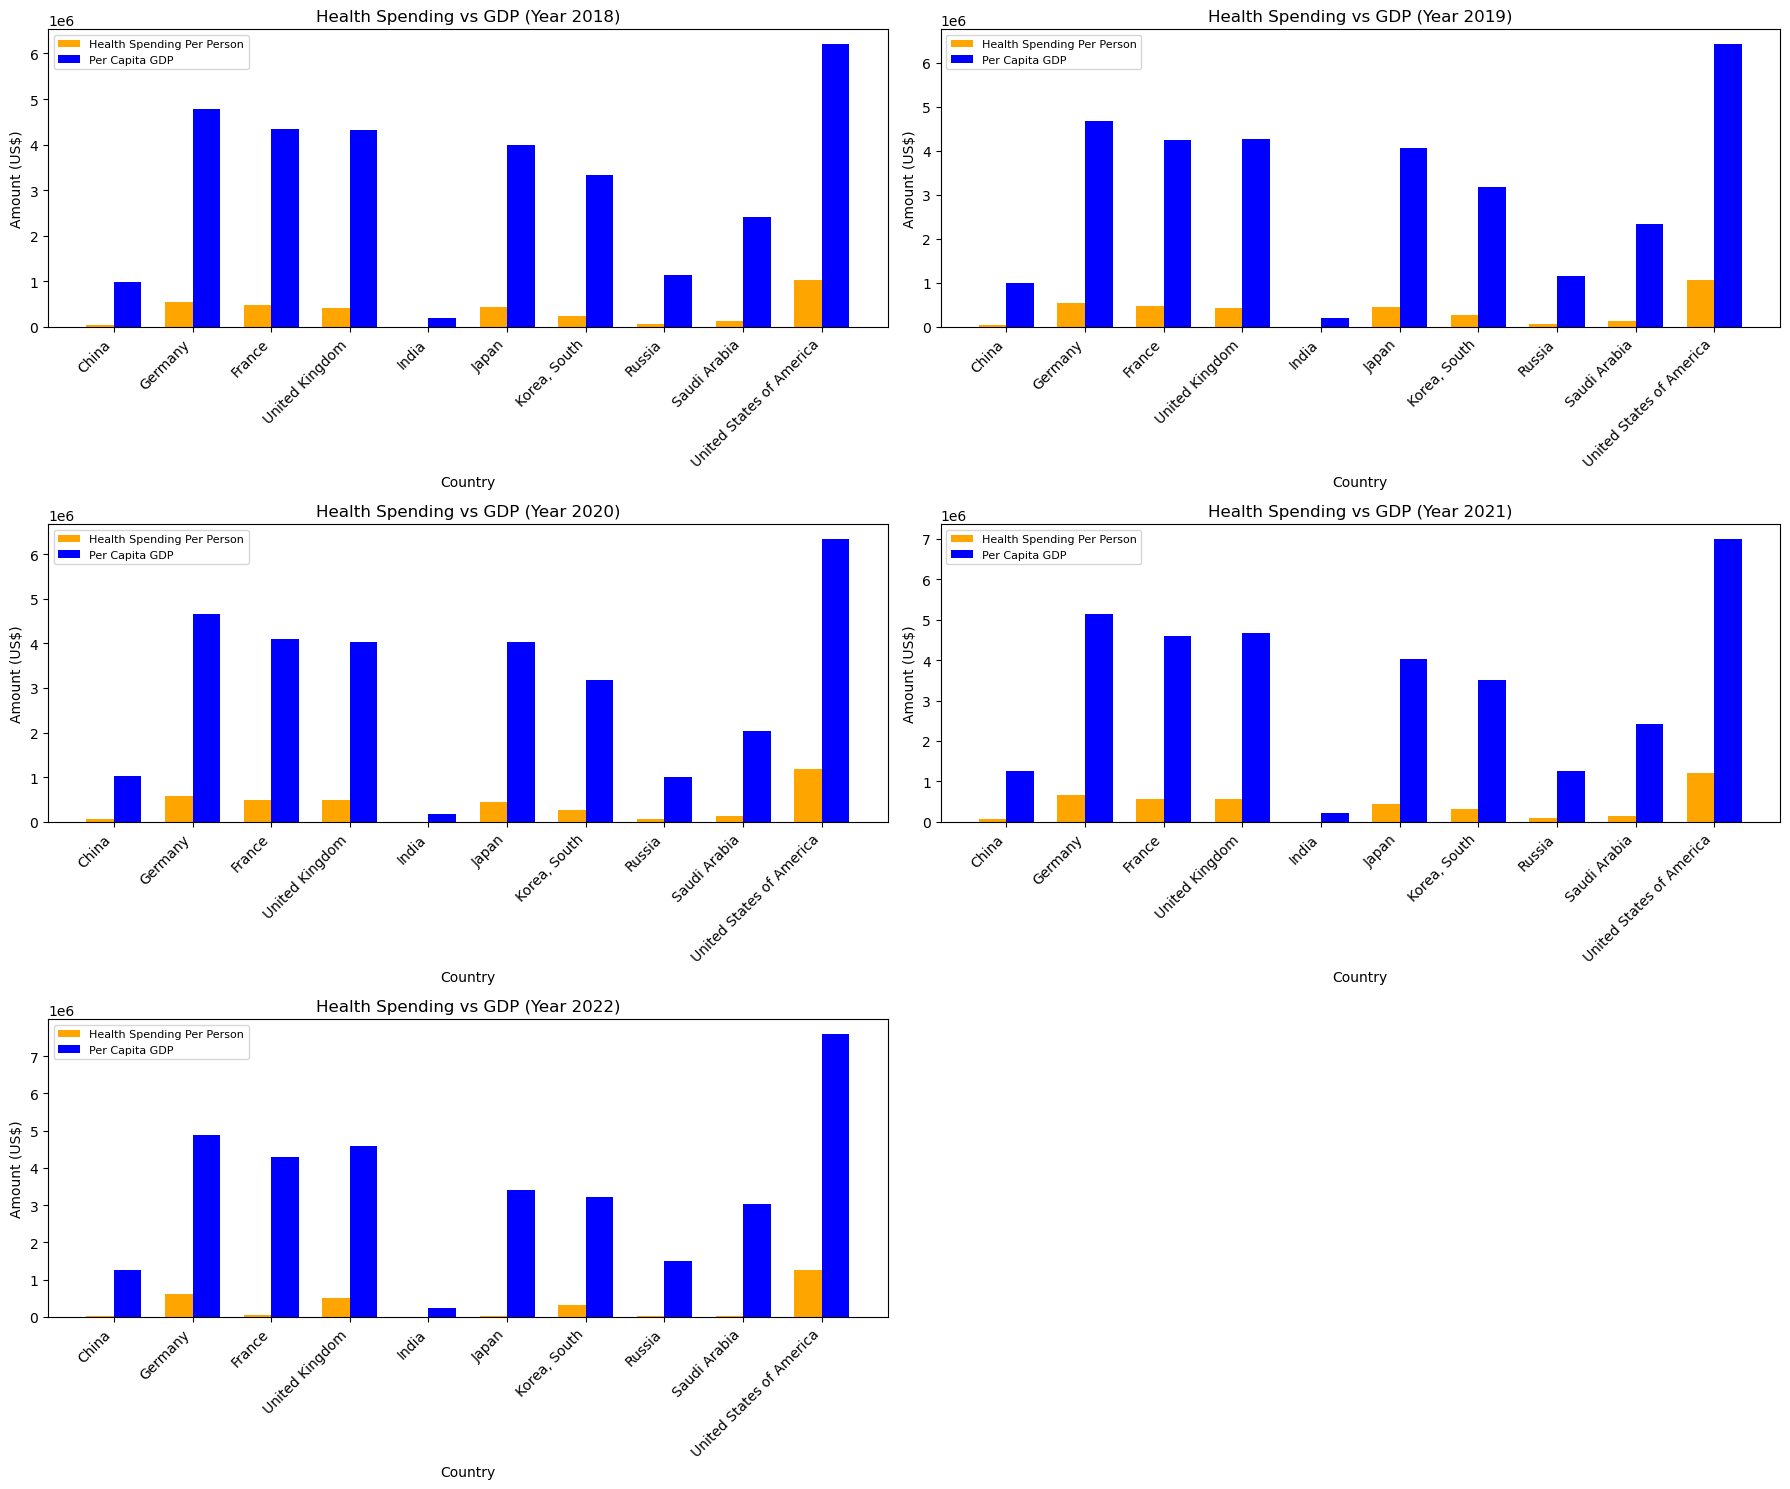

In [793]:
import matplotlib.pyplot as plt

def plot_health_spending_vs_gdp_absolute_all_years(merged_data_health):
    # Get all unique years from the dataset
    unique_years = merged_data_health["Year"].unique()
    num_years = len(unique_years)

    # Set up the figure for multiple subplots with sufficient size
    fig, axes = plt.subplots(nrows=(num_years + 1) // 2, ncols=2, figsize=(18, num_years * 3))

    # Flatten axes array for easier indexing (handles single-row cases)
    axes = axes.flatten()

    # Loop through each year and plot the chart
    for idx, year in enumerate(unique_years):
        # Filter data for the specified year
        year_data_health = merged_data_health[merged_data_health["Year"] == year]

        # Grouped Bar Chart for Absolute Values
        ax = axes[idx]
        bar_width = 0.35
        x = range(len(year_data_health["Country Name"]))

        # Plot Health Spending Per Person and GDP Per Capita
        ax.bar(x, year_data_health["Health Spending Per Person"], width=bar_width, label="Health Spending Per Person", color="orange")
        ax.bar([i + bar_width for i in x], year_data_health["GDP Per Capita"], width=bar_width, label="Per Capita GDP", color="blue")

        # Add labels and titles for each subplot
        ax.set_xlabel("Country", fontsize=10)
        ax.set_ylabel("Amount (US$)", fontsize=10)
        ax.set_title(f"Health Spending vs GDP (Year {year})", fontsize=12)
        ax.set_xticks([i + bar_width / 2 for i in x])
        ax.set_xticklabels(year_data_health["Country Name"], rotation=45, ha="right")
        ax.legend(fontsize=8)

    # Remove any unused subplots
    for idx in range(num_years, len(axes)):
        fig.delaxes(axes[idx])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the combined plot
    plt.savefig("health_spending_vs_gdp_absolute_all_years.png", dpi=300)

    # Show the plot
    plt.show()

plot_health_spending_vs_gdp_absolute_all_years(merged_data_health)


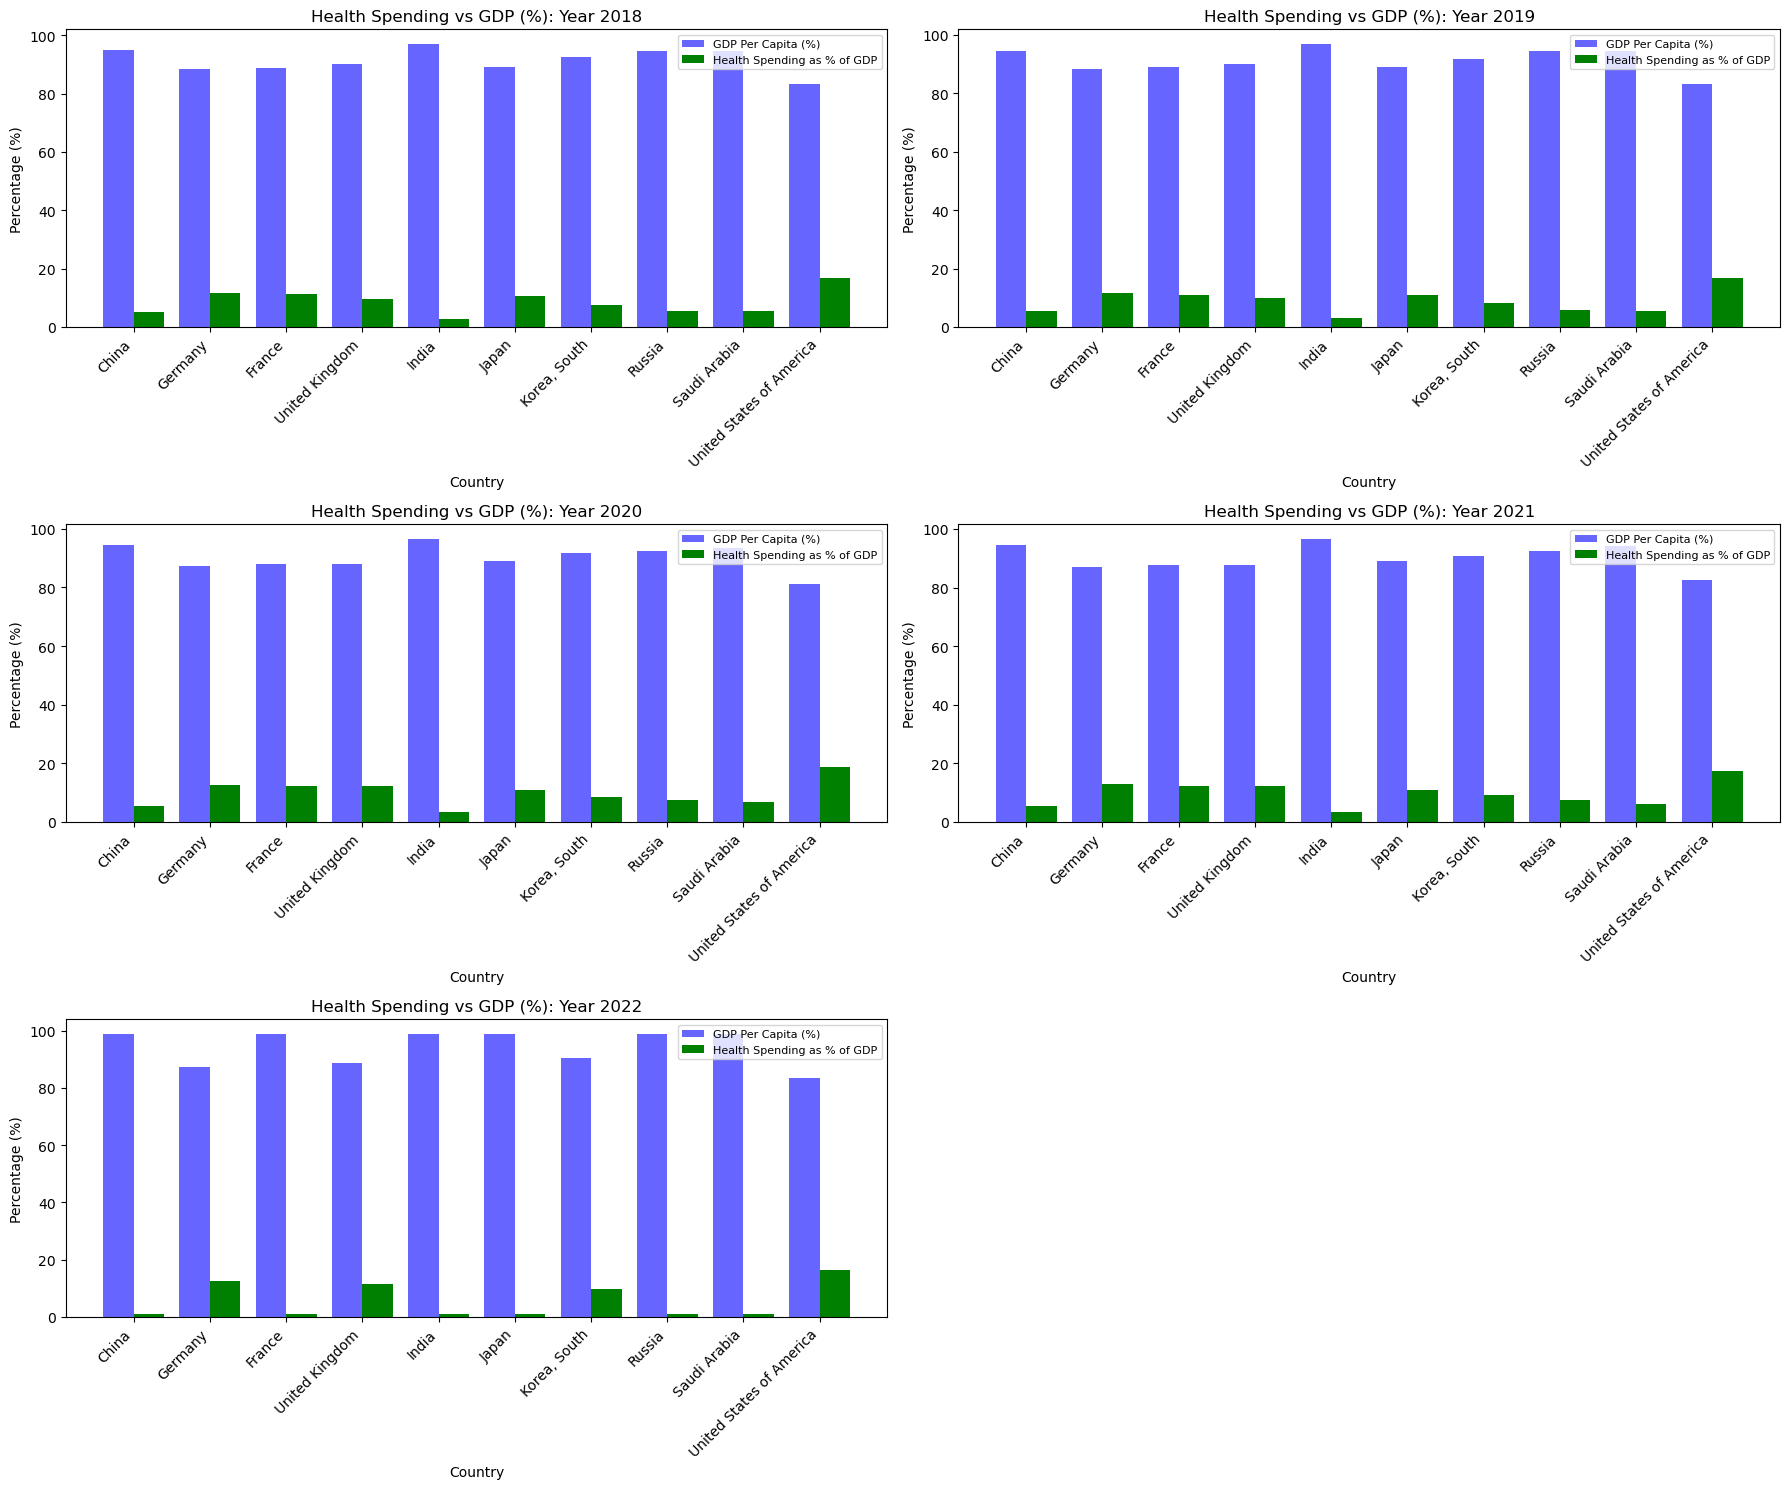

In [794]:
def plot_health_spending_percentage_vs_gdp_all_years(merged_data_health):
    # Get all unique years from the dataset
    unique_years = merged_data_health["Year"].unique()
    num_years = len(unique_years)

    # Set up the figure for multiple subplots with sufficient size
    fig, axes = plt.subplots(nrows=(num_years + 1) // 2, ncols=2, figsize=(18, num_years * 3))

    # Flatten axes array for easier indexing (handles single-row cases)
    axes = axes.flatten()

    # Loop through each year and plot the chart
    for idx, year in enumerate(unique_years):
        # Filter data for the specified year
        year_data_health = merged_data_health[merged_data_health["Year"] == year]

        # Grouped Bar Chart
        ax = axes[idx]
        bar_width = 0.4
        x = range(len(year_data_health["Country Name"]))

        # Plot GDP Per Capita and Health Spending as % of GDP
        ax.bar(x, year_data_health["GDP Per Capita (%)"], width=bar_width, color="blue", alpha=0.6, label="GDP Per Capita (%)")
        ax.bar([i + bar_width for i in x], year_data_health["Health % of GDP"], width=bar_width, color="green", label="Health Spending as % of GDP")

        # Add labels, titles, and legend for each subplot
        ax.set_xlabel("Country", fontsize=10)
        ax.set_ylabel("Percentage (%)", fontsize=10)
        ax.set_title(f"Health Spending vs GDP (%): Year {year}", fontsize=12)
        ax.set_xticks([i + bar_width / 2 for i in x])
        ax.set_xticklabels(year_data_health["Country Name"], rotation=45, ha="right")
        ax.legend(fontsize=8)

    # Remove any unused subplots
    for idx in range(num_years, len(axes)):
        fig.delaxes(axes[idx])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the combined plot
    plt.savefig("health_spending_vs_gdp_percentage_all_years.png", dpi=300)

    # Show the plot
    plt.show()

plot_health_spending_percentage_vs_gdp_all_years(merged_data_health)


## Per person military vs per person gdp

In [795]:
military_capta

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,2054.8305,2196.5306,2317.0583,2392.3887,2544.2437
China,164.0926,169.0264,181.0429,200.5273,204.7557
Russia,422.9891,447.3751,423.8004,454.2132,707.3769
India,48.3986,51.6725,52.2327,54.2416,56.4340
Saudi Arabia,2130.6833,1824.3969,1793.4383,1757.8489,1947.8700
United Kingdom,840.4395,847.0867,869.8664,968.1220,949.2310
Germany,560.9090,590.2661,639.8577,677.5423,673.5411
France,799.8042,778.2442,818.0376,877.8261,829.9743
Japan,384.4246,403.6664,410.3680,408.9258,378.2125


In [796]:
gdp_pc

,Country,2018,2019,2020,2021,2022
0,United States of America,6219219.4557,6437363.9028,6347211.5722,7001237.6335,7610070.7381
1,China,980489.8330,1004369.2175,1030585.3800,1249189.3307,1261473.8368
2,Russia,1137121.6823,1158901.4134,1015947.5118,1257602.0504,1508255.1562
3,India,199640.6769,202955.8874,186067.3075,218681.8976,238730.0629
4,Saudi Arabia,2417567.4986,2340594.2260,2039812.1325,2431588.6138,3044773.3253
5,United Kingdom,4322012.9346,4266893.8298,4023032.1481,4669649.3736,4576977.0439
6,Germany,4791847.6655,4677815.0146,4655976.7512,5128904.9222,4890874.3433
7,France,4339665.7120,4237737.9260,4097404.0869,4585370.3427,4294991.6451
8,Japan,3994032.5487,4068268.7076,4033306.8171,4020860.0087,3419993.9569
9,"Korea, South",3337997.2459,3186946.8763,3173088.2559,3508705.3578,3230931.1598


In [797]:
gdp_pc = gdp_pc.set_index("Country")
gdp_pc

,2018,2019,2020,2021,2022
Country,,,,,
United States of America,6219219.4557,6437363.9028,6347211.5722,7001237.6335,7610070.7381
China,980489.8330,1004369.2175,1030585.3800,1249189.3307,1261473.8368
Russia,1137121.6823,1158901.4134,1015947.5118,1257602.0504,1508255.1562
India,199640.6769,202955.8874,186067.3075,218681.8976,238730.0629
Saudi Arabia,2417567.4986,2340594.2260,2039812.1325,2431588.6138,3044773.3253
United Kingdom,4322012.9346,4266893.8298,4023032.1481,4669649.3736,4576977.0439
Germany,4791847.6655,4677815.0146,4655976.7512,5128904.9222,4890874.3433
France,4339665.7120,4237737.9260,4097404.0869,4585370.3427,4294991.6451
Japan,3994032.5487,4068268.7076,4033306.8171,4020860.0087,3419993.9569


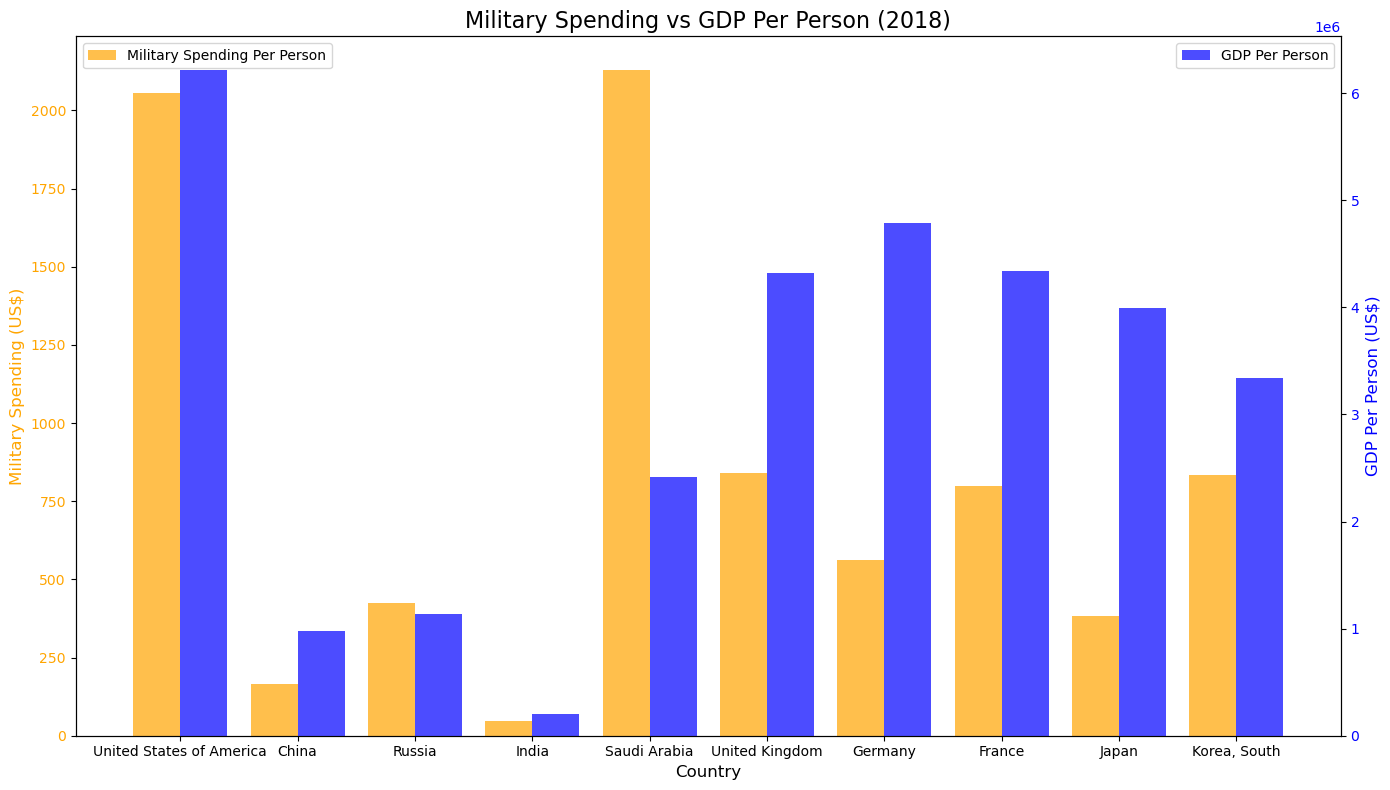

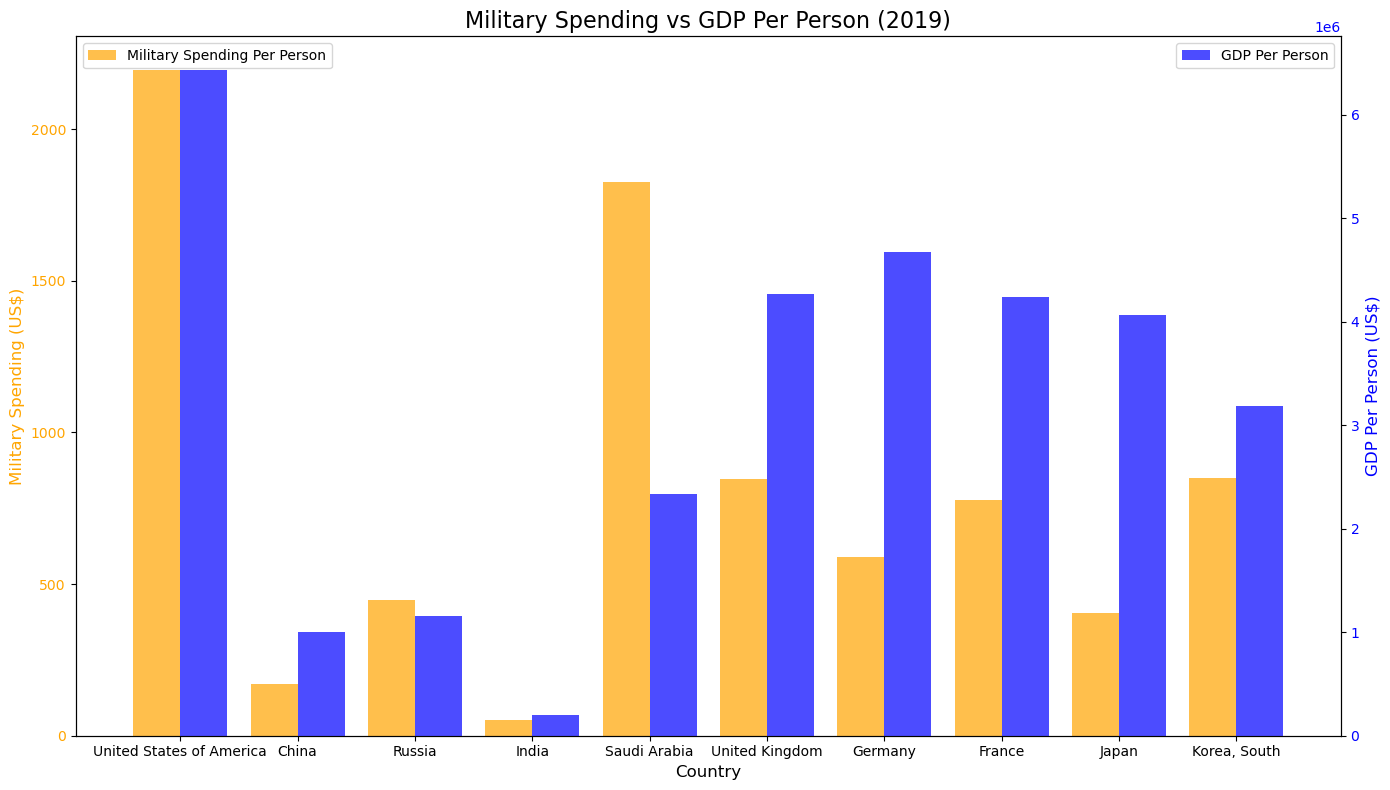

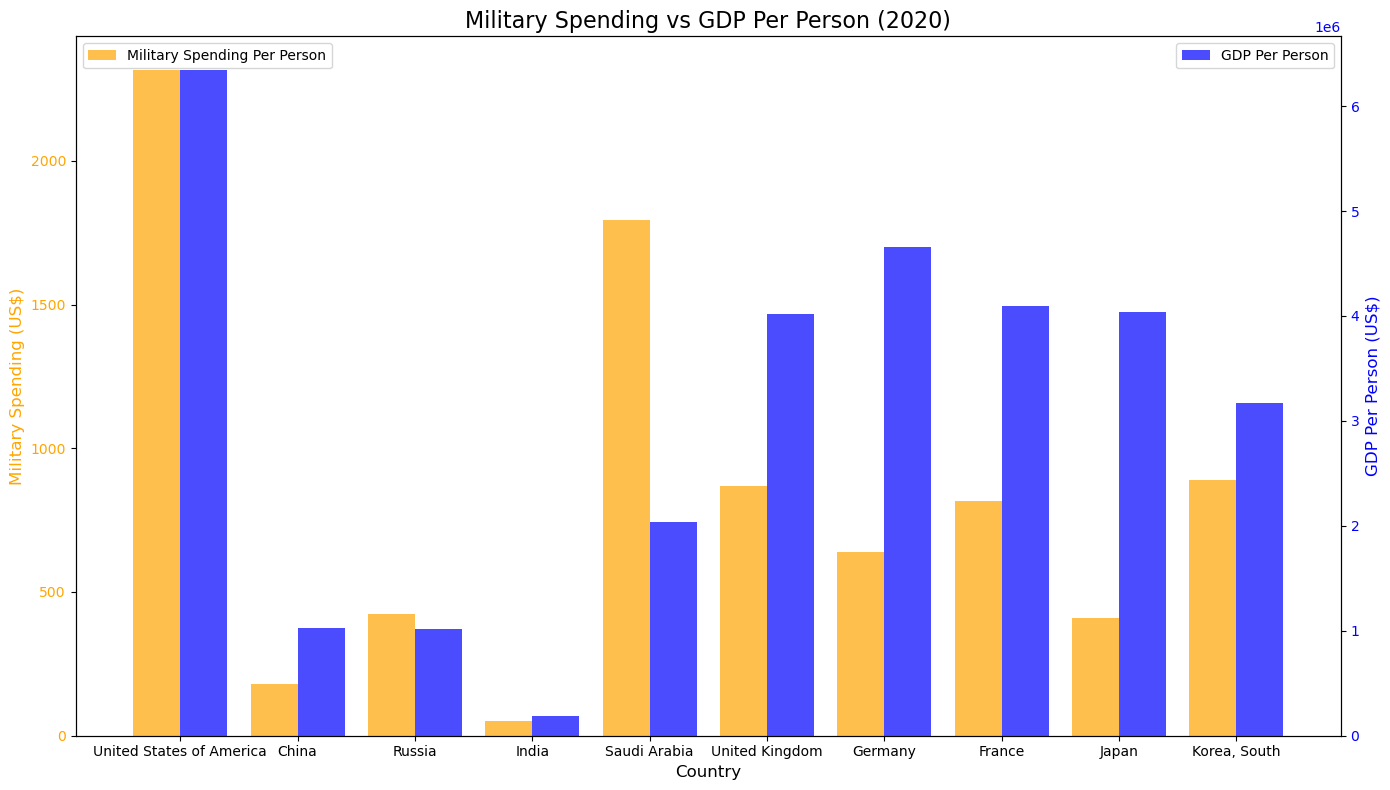

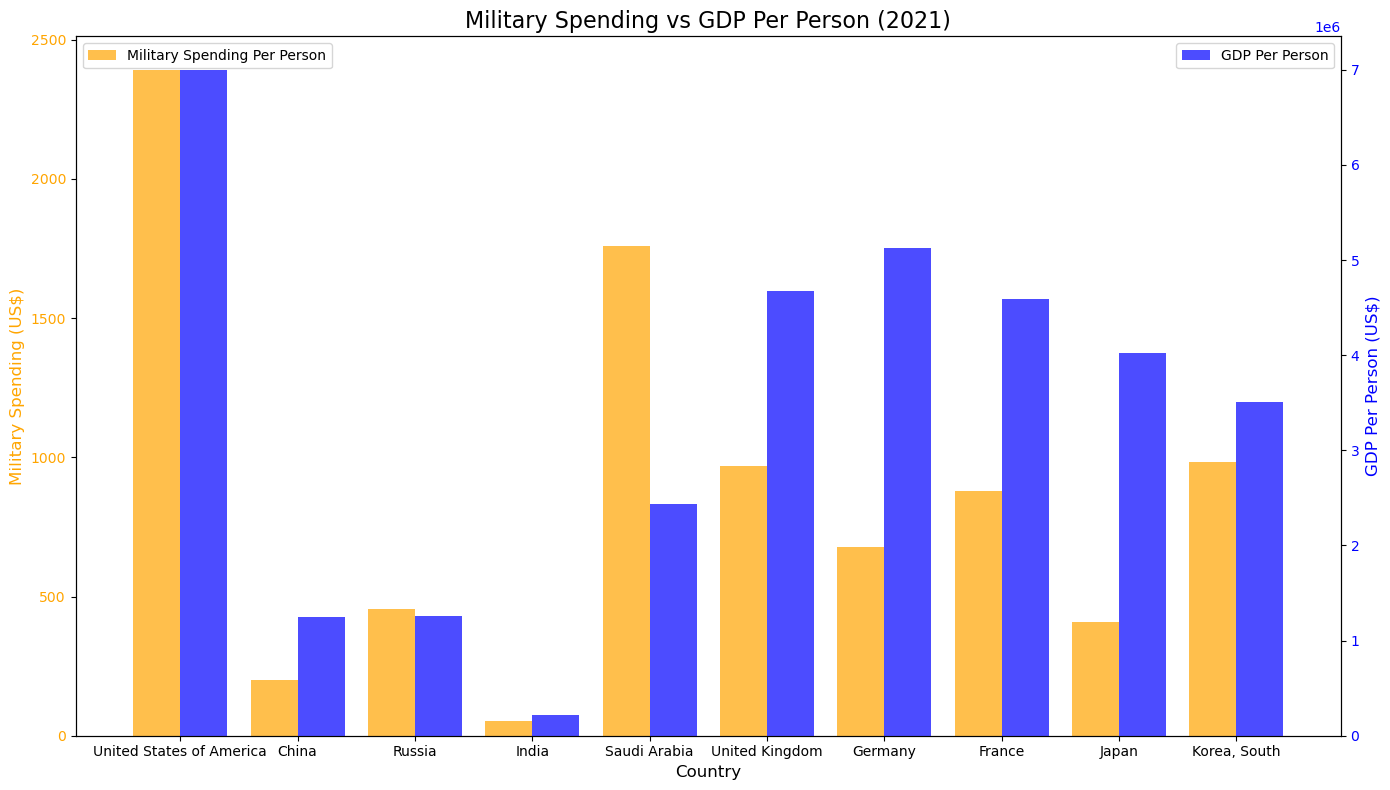

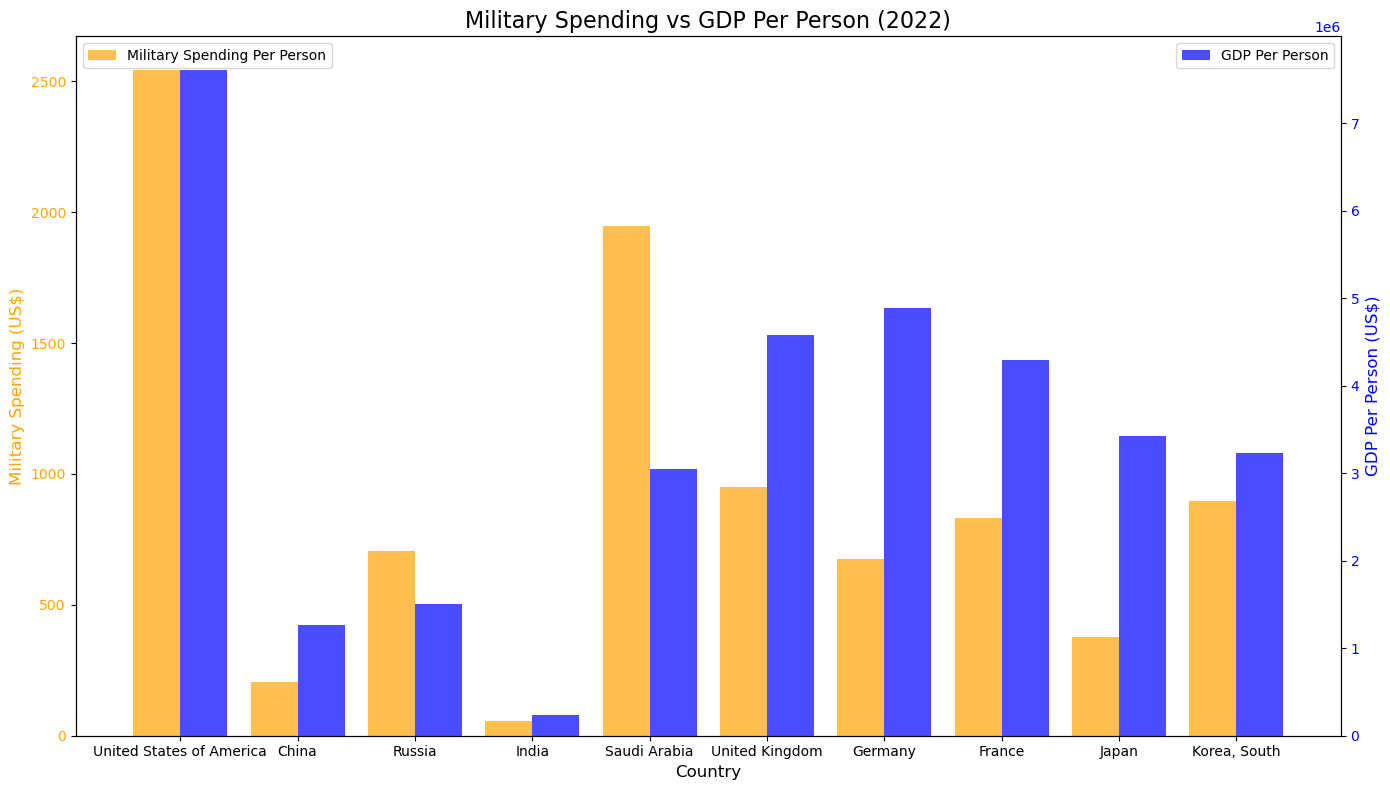

In [817]:
import matplotlib.pyplot as plt

def plot_military_spending_vs_gdp_ab_all_years(military_capta, gdp_pc):
    # Ensure all column names are strings
    military_capta.columns = military_capta.columns.astype(str)
    gdp_pc.columns = gdp_pc.columns.astype(str)

    # Find common years between the two DataFrames
    common_years = military_capta.columns.intersection(gdp_pc.columns)

    if len(common_years) == 0:
        raise KeyError("No matching years found between military spending and GDP data.")

    # Iterate through each year and create a plot
    for year in common_years:
        military_data = military_capta[year]
        gdp_data = gdp_pc[year]

        # Ensure the indices align (countries)
        countries = military_data.index

        # Bar width and positions
        bar_width = 0.4
        x_positions = range(len(countries))  # X-axis positions for countries

        # Create a figure and axis with secondary y-axis
        fig, ax1 = plt.subplots(figsize=(14, 8))

        # Plot military spending on primary y-axis
        ax1.bar(x_positions, military_data, width=bar_width, label="Military Spending Per Person", color="orange", alpha=0.7)
        ax1.set_ylabel("Military Spending (US$)", fontsize=12, color="orange")
        ax1.tick_params(axis='y', labelcolor="orange")

        # Plot GDP on secondary y-axis
        ax2 = ax1.twinx()
        ax2.bar([pos + bar_width for pos in x_positions], gdp_data, width=bar_width, label="GDP Per Person", color="blue", alpha=0.7)
        ax2.set_ylabel("GDP Per Person (US$)", fontsize=12, color="blue")
        ax2.tick_params(axis='y', labelcolor="blue")

        # Add title and x-axis labels
        plt.title(f"Military Spending vs GDP Per Person ({year})", fontsize=16)
        ax1.set_xlabel("Country", fontsize=12)
        plt.xticks([pos + bar_width / 2 for pos in x_positions], countries, rotation=45, ha="right")

        # Add a legend for both bars
        ax1.legend(loc="upper left")
        ax2.legend(loc="upper right")

        # Adjust layout and display the chart
        plt.tight_layout()
        plt.show()

        # Save the plot to a file
        fig.savefig(f"military_spending_gdp_pc_abs_{year}.png", bbox_inches="tight")

# Call the function
plot_military_spending_vs_gdp_ab_all_years(military_capta, gdp_pc)


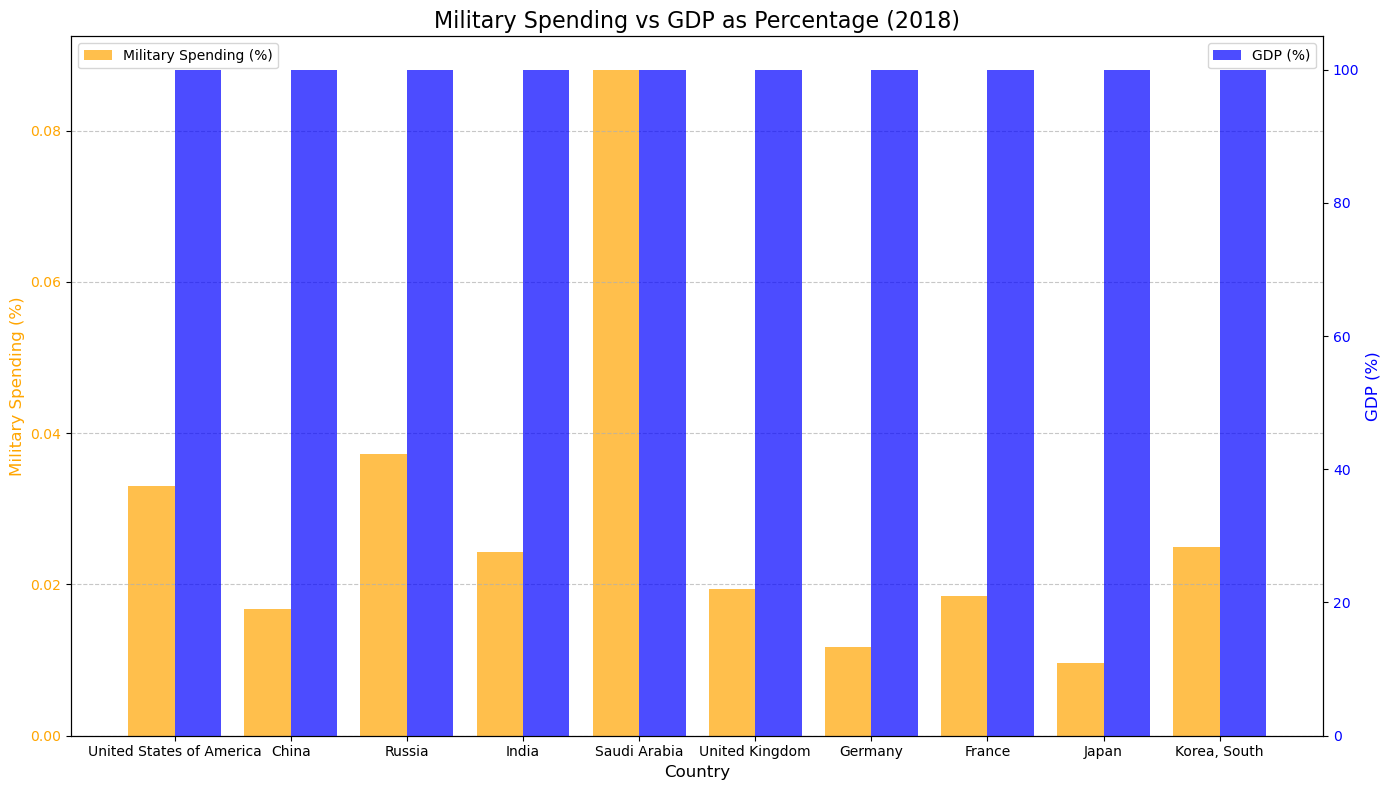

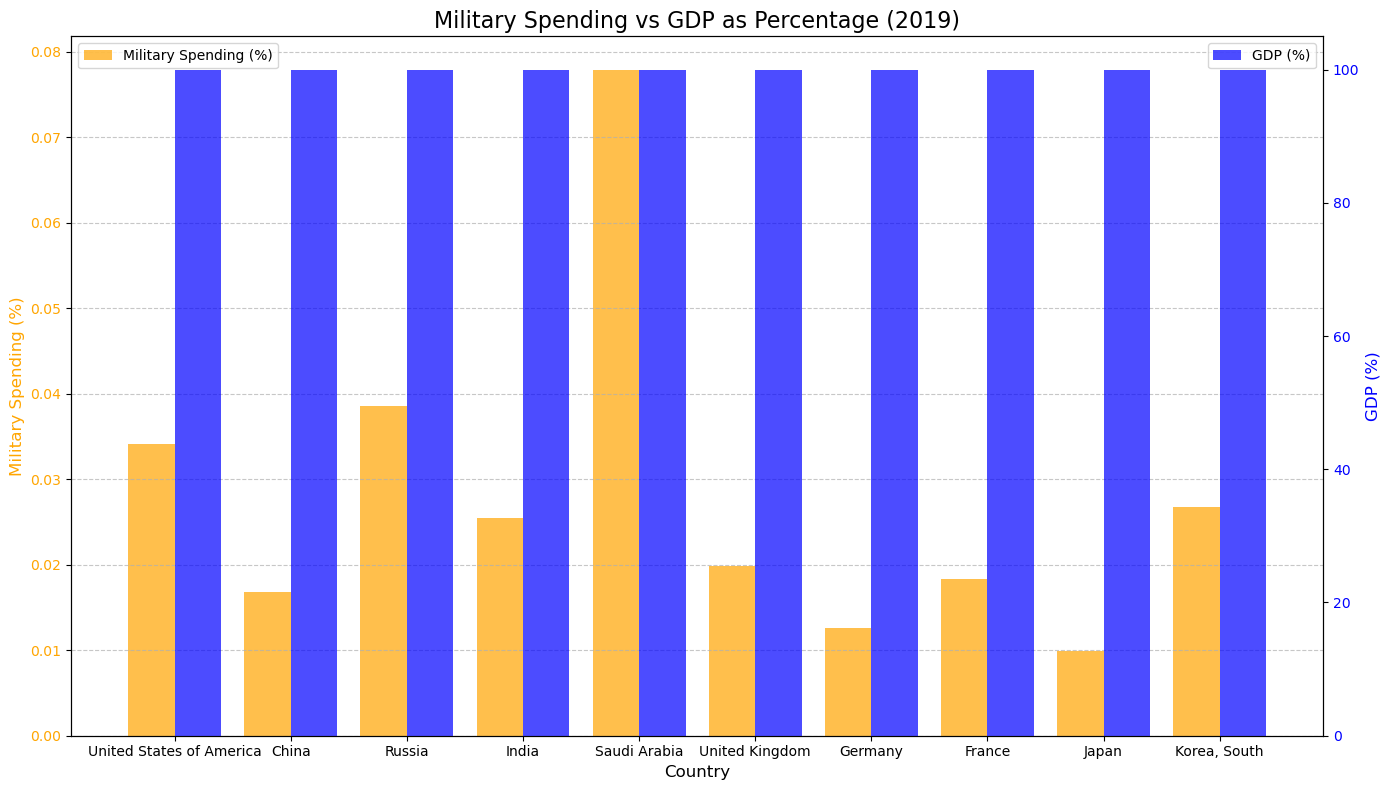

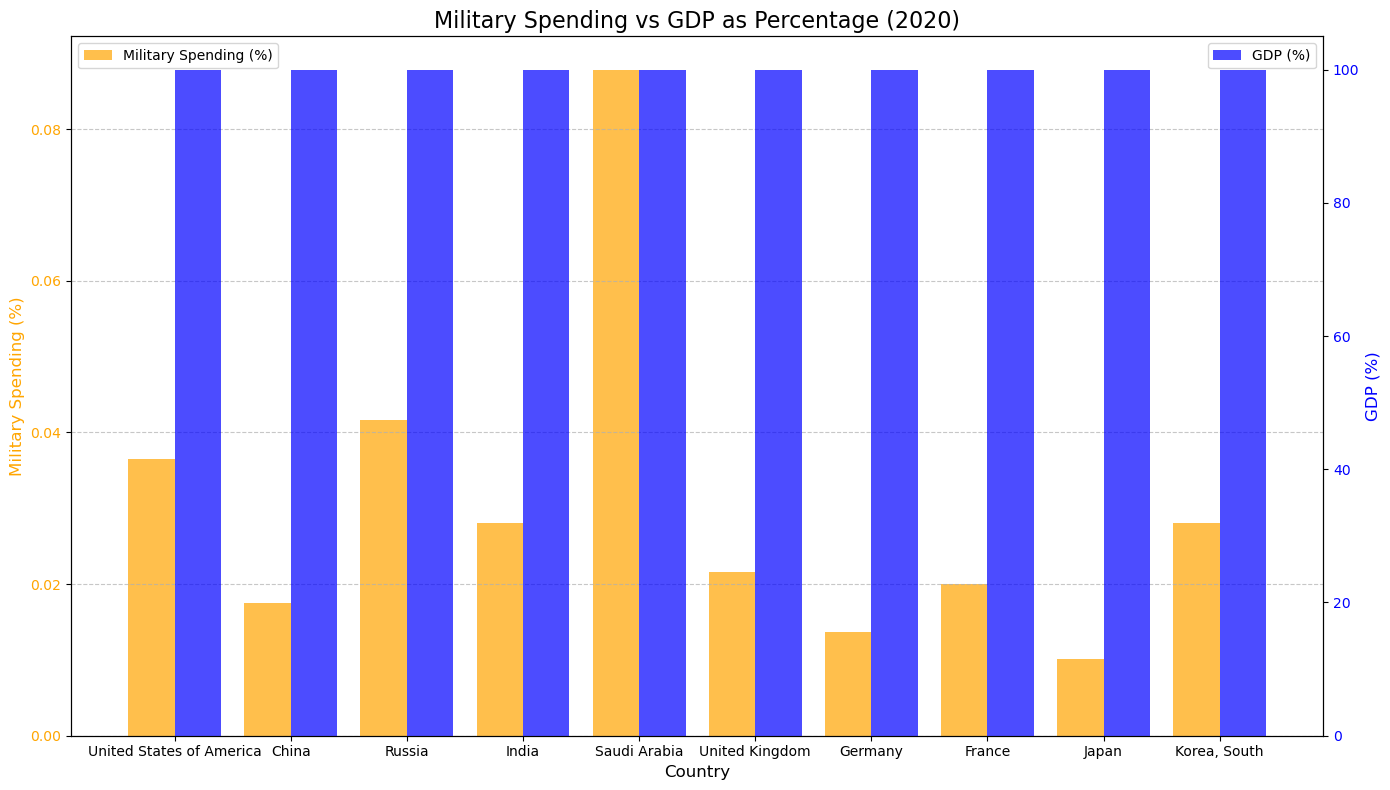

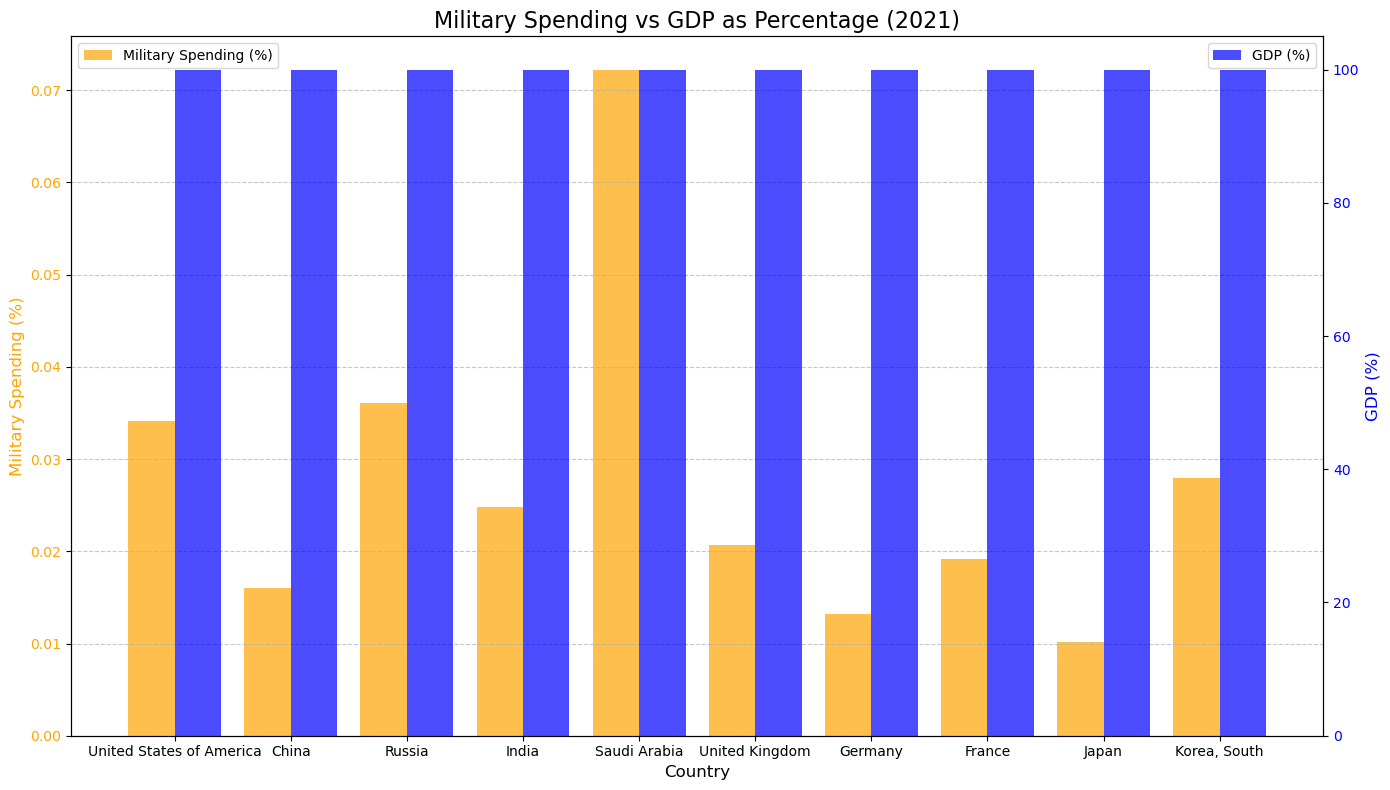

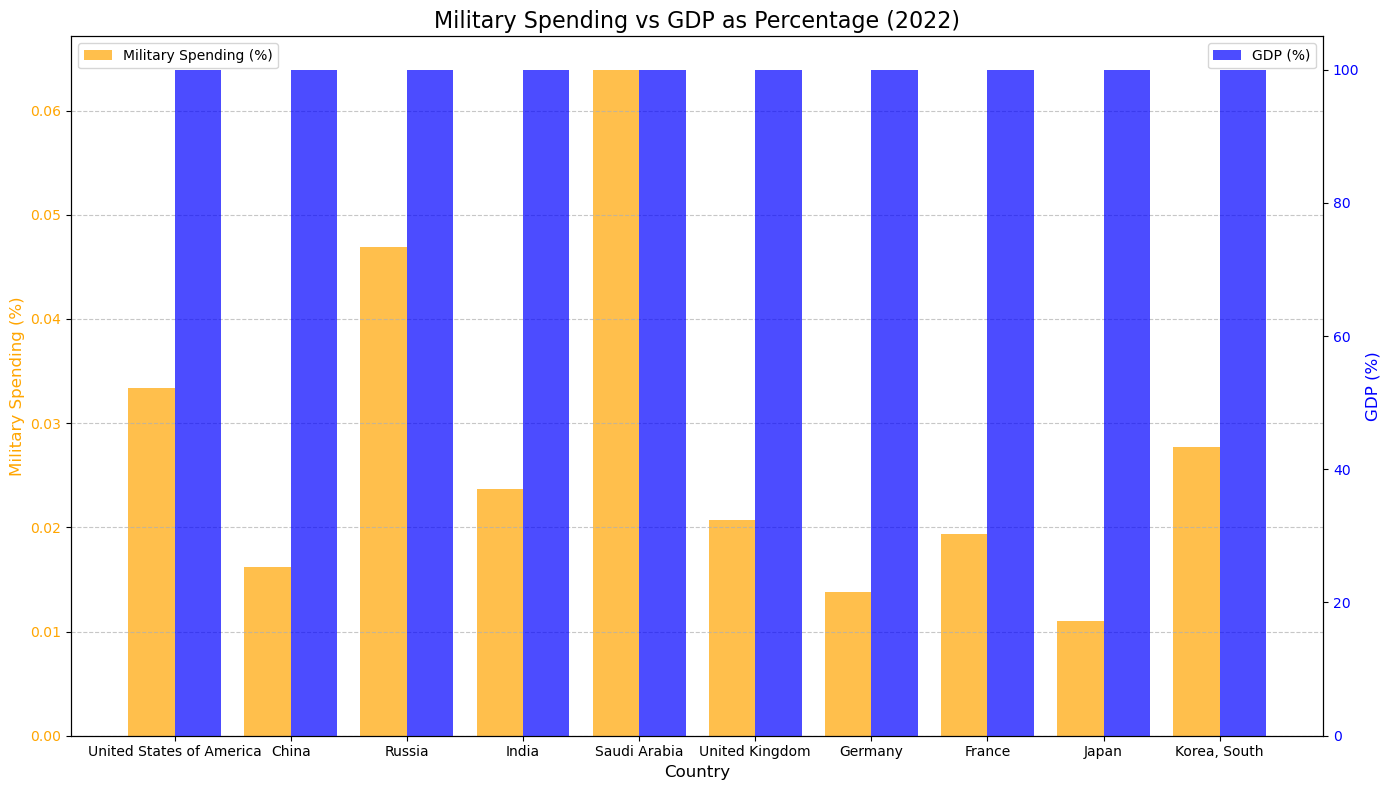

In [819]:
import matplotlib.pyplot as plt

def plot_military_spending_vs_gdp_percentage_all_years(military_capta, gdp_pc):
    # Ensure all column names are strings
    military_capta.columns = military_capta.columns.astype(str)
    gdp_pc.columns = gdp_pc.columns.astype(str)

    # Find common years between the two DataFrames
    common_years = military_capta.columns.intersection(gdp_pc.columns)

    if len(common_years) == 0:
        raise KeyError("No matching years found between military spending and GDP data.")

    # Iterate through each year and create a plot
    for year in common_years:
        military_data = military_capta[year]
        gdp_data = gdp_pc[year]

        # Ensure the indices align (countries)
        countries = military_data.index

        # Calculate percentages
        total_spending = military_data + gdp_data
        military_percentage = (military_data / total_spending) * 100
        gdp_percentage = (gdp_data / total_spending) * 100

        # Bar width and positions
        bar_width = 0.4
        x_positions = range(len(countries))  # X-axis positions for countries

        # Create a figure and axis with secondary y-axis
        fig, ax1 = plt.subplots(figsize=(14, 8))

        # Plot military percentage on primary y-axis
        ax1.bar(x_positions, military_percentage, width=bar_width, label="Military Spending (%)", color="orange", alpha=0.7)
        ax1.set_ylabel("Military Spending (%)", fontsize=12, color="orange")
        ax1.tick_params(axis='y', labelcolor="orange")

        # Plot GDP percentage on secondary y-axis
        ax2 = ax1.twinx()
        ax2.bar([pos + bar_width for pos in x_positions], gdp_percentage, width=bar_width, label="GDP (%)", color="blue", alpha=0.7)
        ax2.set_ylabel("GDP (%)", fontsize=12, color="blue")
        ax2.tick_params(axis='y', labelcolor="blue")

        # Add title and x-axis labels
        plt.title(f"Military Spending vs GDP as Percentage ({year})", fontsize=16)
        ax1.set_xlabel("Country", fontsize=12)
        plt.xticks([pos + bar_width / 2 for pos in x_positions], countries, rotation=45, ha="right")

        # Add a legend for both bars
        ax1.legend(loc="upper left")
        ax2.legend(loc="upper right")

        # Add grid for better visibility
        ax1.grid(axis="y", linestyle="--", alpha=0.7)

        # Adjust layout and display the chart
        plt.tight_layout()
        plt.show()

        # Save the plot to a file
        fig.savefig(f"military_spending_gdp_percentage_{year}.png", bbox_inches="tight")

plot_military_spending_vs_gdp_percentage_all_years(military_capta, gdp_pc)


## Fastest growing countries in Health Spending

In [799]:
health_spending

,Country Name,2018,2019,2020,2021,2022
40,China,5.1679,5.3503,5.5936,5.3836,1.0000
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547
77,France,11.2080,11.0889,12.1310,12.3079,1.0000
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445
109,India,2.8600,2.9500,3.3400,3.2800,1.0000
119,Japan,10.7400,10.9700,11.0000,10.8200,1.0000
126,"Korea, South",7.4912,8.1748,8.3498,9.3315,9.7205
202,Russia,5.3600,5.6500,7.5700,7.3900,1.0000
205,Saudi Arabia,5.3406,5.4674,6.6463,5.9684,1.0000
251,United States of America,16.6296,16.6658,18.7562,17.3626,16.5712


In [800]:

# Calculate fixed growth
health_spending['Fixed Growth'] = health_spending['2022'] - health_spending['2018']

# Calculate percentage growth
health_spending['Percentage Growth (%)'] = ((health_spending['2022'] - health_spending['2018']) / health_spending['2018']) * 100

health_spending

,Country Name,2018,2019,2020,2021,2022,Fixed Growth,Percentage Growth (%)
40,China,5.1679,5.3503,5.5936,5.3836,1.0000,-4.1679,-80.6498
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547,1.1742,10.2277
77,France,11.2080,11.0889,12.1310,12.3079,1.0000,-10.2080,-91.0778
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445,1.6138,16.5840
109,India,2.8600,2.9500,3.3400,3.2800,1.0000,-1.8600,-65.0350
119,Japan,10.7400,10.9700,11.0000,10.8200,1.0000,-9.7400,-90.6890
126,"Korea, South",7.4912,8.1748,8.3498,9.3315,9.7205,2.2293,29.7587
202,Russia,5.3600,5.6500,7.5700,7.3900,1.0000,-4.3600,-81.3433
205,Saudi Arabia,5.3406,5.4674,6.6463,5.9684,1.0000,-4.3406,-81.2756
251,United States of America,16.6296,16.6658,18.7562,17.3626,16.5712,-0.0585,-0.3517


In [801]:
health_spending_sort = health_spending.sort_values(by='Percentage Growth (%)', ascending=False)

In [802]:
health_spending_sort

,Country Name,2018,2019,2020,2021,2022,Fixed Growth,Percentage Growth (%)
126,"Korea, South",7.4912,8.1748,8.3498,9.3315,9.7205,2.2293,29.7587
81,United Kingdom,9.7308,9.9576,12.1586,12.3647,11.3445,1.6138,16.5840
55,Germany,11.4805,11.7155,12.6926,12.9341,12.6547,1.1742,10.2277
251,United States of America,16.6296,16.6658,18.7562,17.3626,16.5712,-0.0585,-0.3517
109,India,2.8600,2.9500,3.3400,3.2800,1.0000,-1.8600,-65.0350
40,China,5.1679,5.3503,5.5936,5.3836,1.0000,-4.1679,-80.6498
205,Saudi Arabia,5.3406,5.4674,6.6463,5.9684,1.0000,-4.3406,-81.2756
202,Russia,5.3600,5.6500,7.5700,7.3900,1.0000,-4.3600,-81.3433
119,Japan,10.7400,10.9700,11.0000,10.8200,1.0000,-9.7400,-90.6890
77,France,11.2080,11.0889,12.1310,12.3079,1.0000,-10.2080,-91.0778


In [803]:
top_countries_health = health_spending_sort

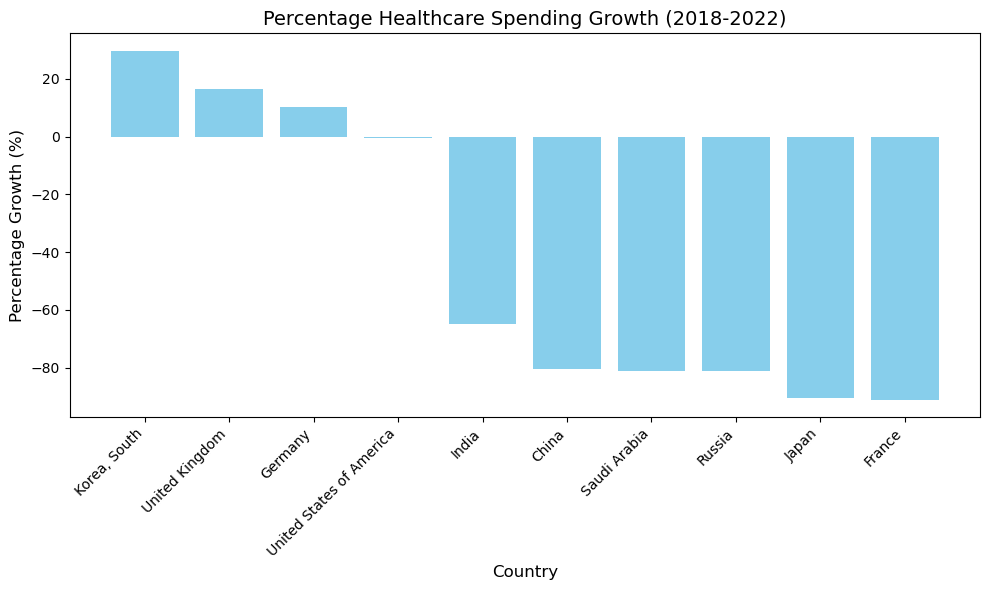

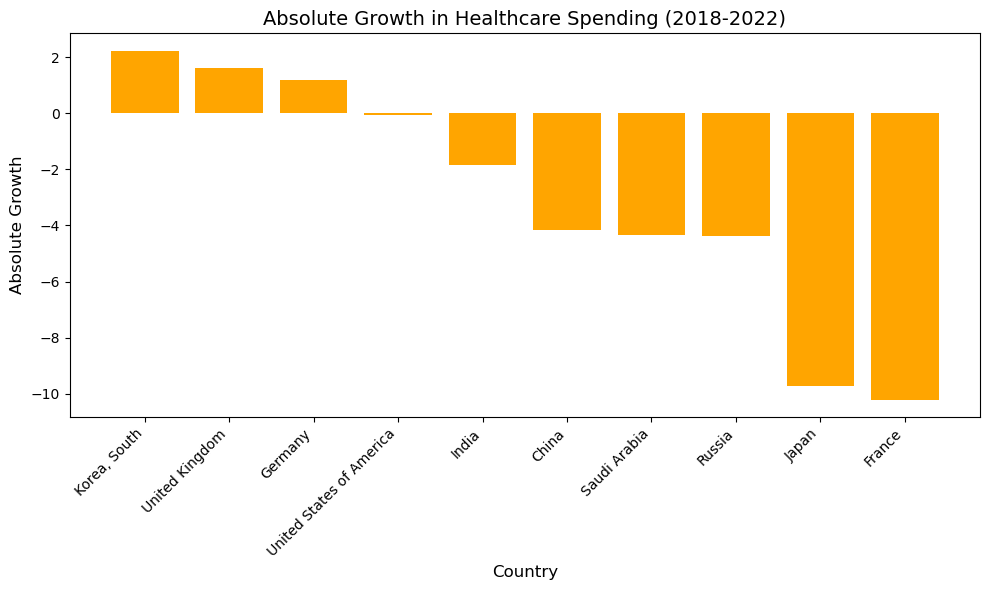

In [804]:
def plot_health_countries_growth(top_countries_health, spending_type="Healthcare"):
    
    # Bar plot for percentage growth
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries_health['Country Name'], top_countries_health['Percentage Growth (%)'], color="skyblue")
    plt.title(f'Percentage {spending_type} Spending Growth (2018-2022)', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Percentage Growth (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Save the plot to a file
    plt.savefig("fast_health_spending_per", bbox_inches="tight")
    plt.show()

    # Bar plot for fixed growth
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries_health['Country Name'], top_countries_health['Fixed Growth'], color="orange")
    plt.title(f'Absolute Growth in {spending_type} Spending (2018-2022)', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Absolute Growth', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Save the plot to a file
    plt.savefig("fast_health_spending_abs", bbox_inches="tight")
    plt.show()

plot_health_countries_growth(top_countries_health, spending_type="Healthcare")

## Fastest growing countries in education

In [805]:
education_spending

,Country Name,2018,2019,2020,2021,2022
40,China,3.5425,3.5411,3.5730,3.2978,3.2984
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439
77,France,5.4072,5.3544,5.6778,5.2400,1.0000
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,1.0000
109,India,4.3770,3.8970,4.2930,4.6350,1.0000
119,Japan,3.0778,3.1553,3.3063,3.4600,1.0000
126,"Korea, South",4.4581,4.6847,4.8017,5.4000,1.0000
202,Russia,4.6782,3.5093,3.7015,1.0000,1.0000
205,Saudi Arabia,1.0000,1.0000,1.0000,1.0000,1.0000
251,United States of America,4.9289,4.9873,5.4354,5.5900,5.4400


In [806]:

# Calculate fixed growth
education_spending['Fixed Growth'] = education_spending['2022'] - education_spending['2018']

# Calculate percentage growth
education_spending['Percentage Growth (%)'] = ((education_spending['2022'] - education_spending['2018']) / education_spending['2018']) * 100

education_spending

,Country Name,2018,2019,2020,2021,2022,Fixed Growth,Percentage Growth (%)
40,China,3.5425,3.5411,3.5730,3.2978,3.2984,-0.2441,-6.8908
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439,-0.4354,-8.7449
77,France,5.4072,5.3544,5.6778,5.2400,1.0000,-4.4072,-81.5060
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,1.0000,-4.1981,-80.7621
109,India,4.3770,3.8970,4.2930,4.6350,1.0000,-3.3770,-77.1533
119,Japan,3.0778,3.1553,3.3063,3.4600,1.0000,-2.0778,-67.5095
126,"Korea, South",4.4581,4.6847,4.8017,5.4000,1.0000,-3.4581,-77.5688
202,Russia,4.6782,3.5093,3.7015,1.0000,1.0000,-3.6782,-78.6243
205,Saudi Arabia,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000
251,United States of America,4.9289,4.9873,5.4354,5.5900,5.4400,0.5111,10.3697


In [807]:
education_spending_sort = education_spending.sort_values(by='Percentage Growth (%)', ascending=False)
education_spending_sort

,Country Name,2018,2019,2020,2021,2022,Fixed Growth,Percentage Growth (%)
251,United States of America,4.9289,4.9873,5.4354,5.5900,5.4400,0.5111,10.3697
205,Saudi Arabia,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000
40,China,3.5425,3.5411,3.5730,3.2978,3.2984,-0.2441,-6.8908
55,Germany,4.9793,5.1168,5.5876,4.5100,4.5439,-0.4354,-8.7449
119,Japan,3.0778,3.1553,3.3063,3.4600,1.0000,-2.0778,-67.5095
109,India,4.3770,3.8970,4.2930,4.6350,1.0000,-3.3770,-77.1533
126,"Korea, South",4.4581,4.6847,4.8017,5.4000,1.0000,-3.4581,-77.5688
202,Russia,4.6782,3.5093,3.7015,1.0000,1.0000,-3.6782,-78.6243
81,United Kingdom,5.1981,5.2487,5.4977,5.4000,1.0000,-4.1981,-80.7621
77,France,5.4072,5.3544,5.6778,5.2400,1.0000,-4.4072,-81.5060


In [808]:
top_countries_education = education_spending_sort

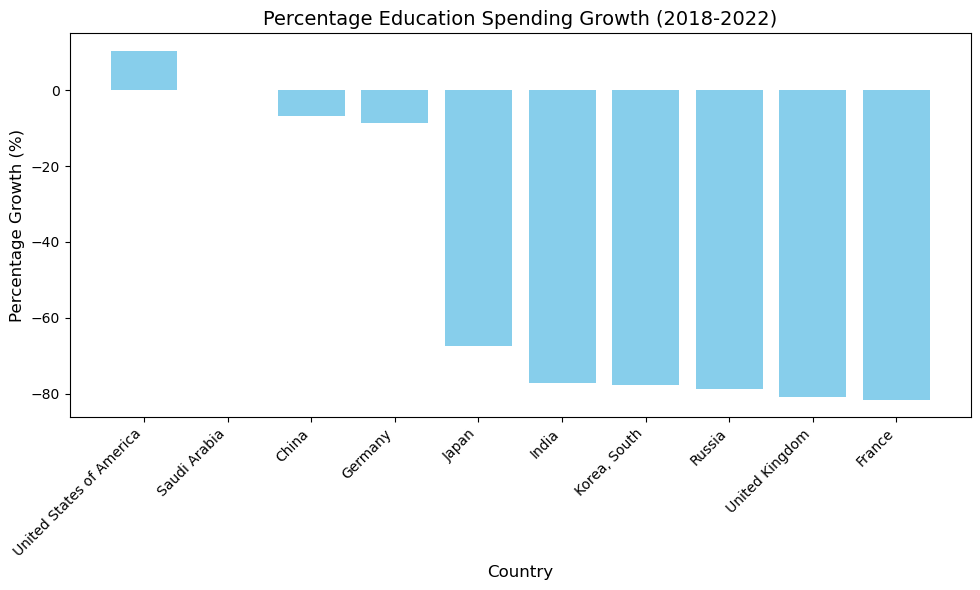

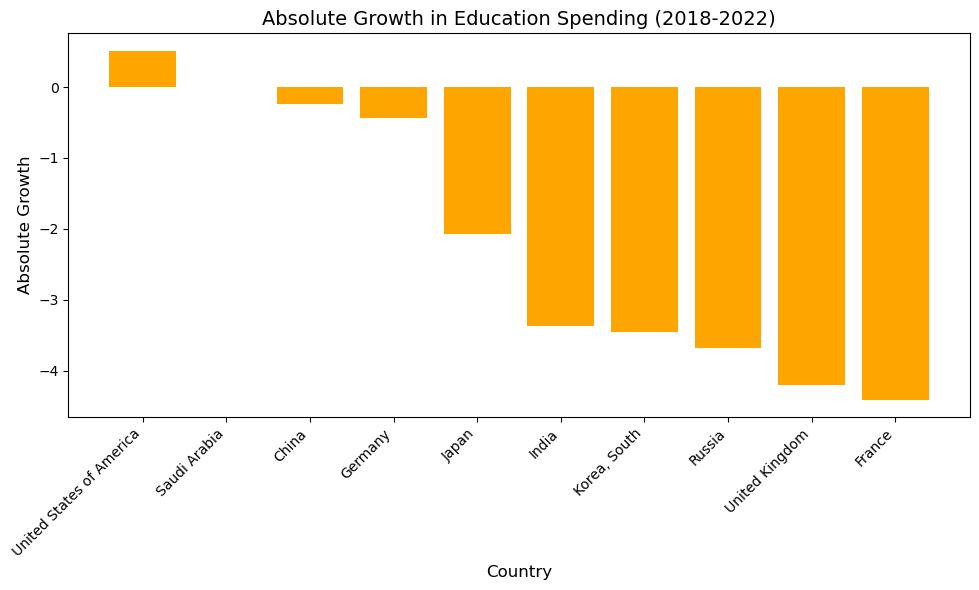

In [809]:
def plot_education_countries_growth(top_countries_education, spending_type="Education"):
    
    
    # Bar plot for percentage growth
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries_education['Country Name'], top_countries_education['Percentage Growth (%)'], color="skyblue")
    plt.title(f'Percentage {spending_type} Spending Growth (2018-2022)', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Percentage Growth (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Save the plot to a file
    plt.savefig("fast_education_spending_per", bbox_inches="tight")
    plt.show()

    # Bar plot for fixed growth
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries_education['Country Name'], top_countries_education['Fixed Growth'], color="orange")
    plt.title(f'Absolute Growth in {spending_type} Spending (2018-2022)', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Absolute Growth', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Save the plot to a file
    plt.savefig("fast_education_spending_per", bbox_inches="tight")
    plt.show()

plot_education_countries_growth(top_countries_education, spending_type="Education")


Military, Health and Education Spending Analysis Menu:
1. Military,Education and Health Spending (fixed value and %)
2. Compare Miltary data to thats Country GDP
3. Compare Educational data to thats Country GDP
4. Compare Health data to thats Country GDP
5. Compare Person Educational Spending to per person GDP (fixed value and %)
6. Compare Person Healthcare Spending to per person GDP (fixed value and %)
7. Compare Person Military Spending to per person GDP (fixed value and %)
8. Find the fastest growing countries in Education spending (fixed value and %)
9. Find the fastest growing countries in Health spending (fixed value and %)
0. Exit



Please select an option (0-9):  1


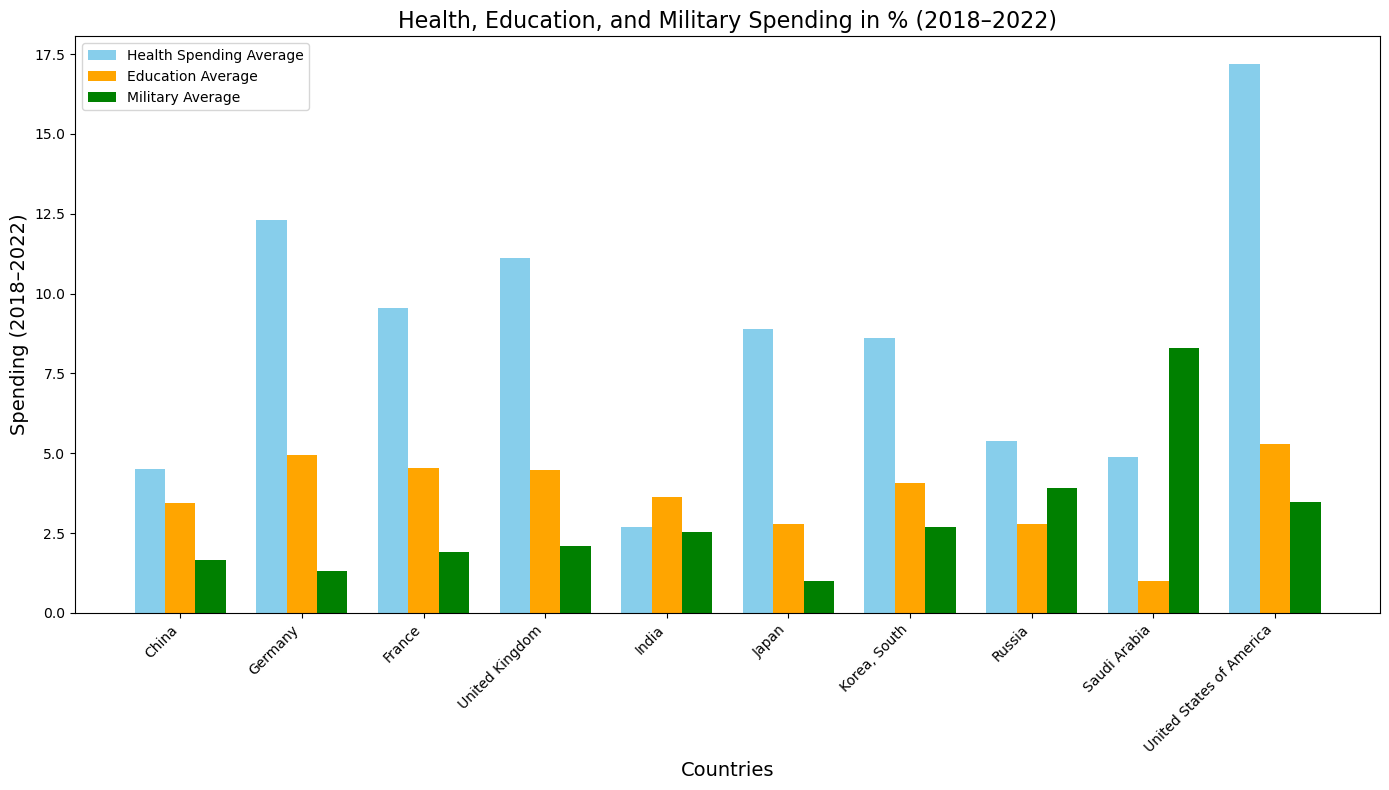

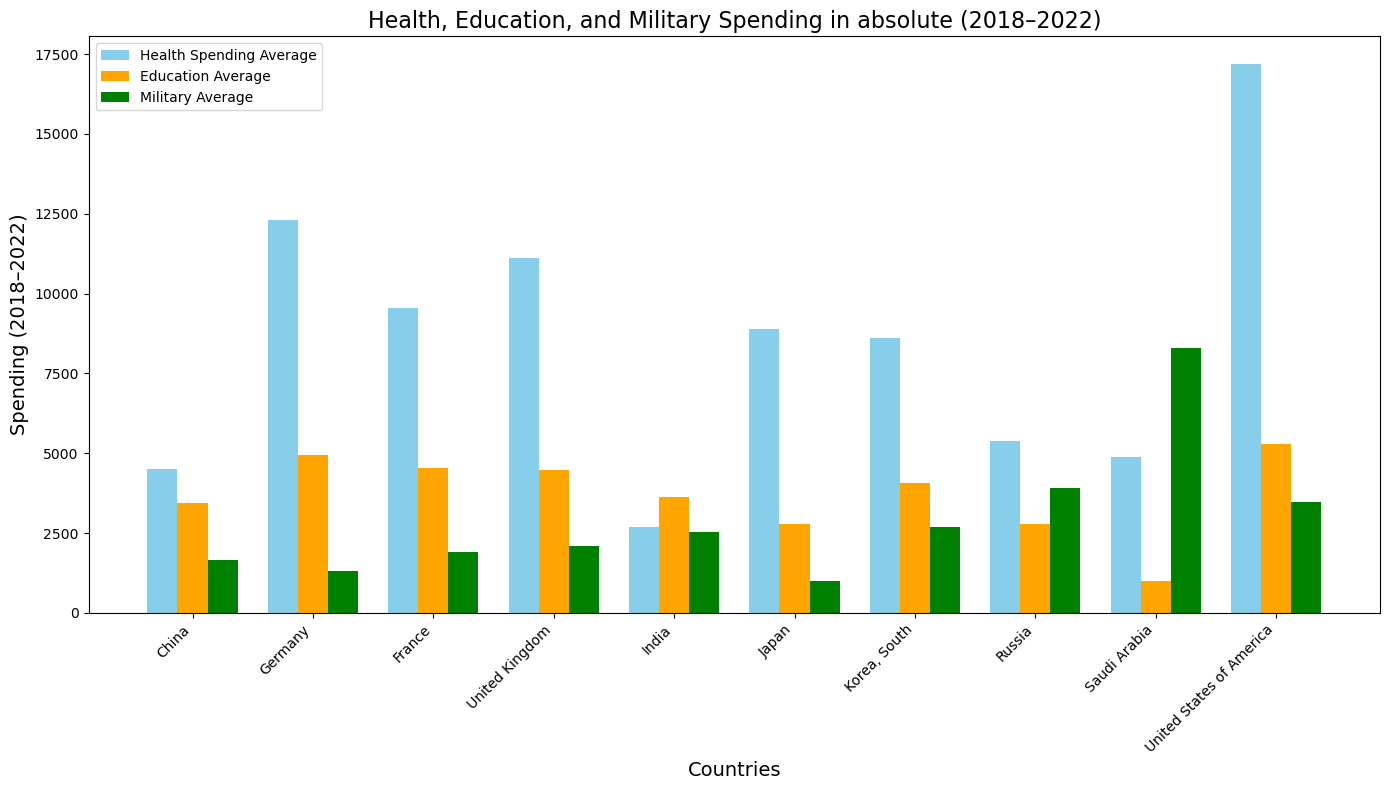

Military, Health and Education Spending Analysis Menu:
1. Military,Education and Health Spending (fixed value and %)
2. Compare Miltary data to thats Country GDP
3. Compare Educational data to thats Country GDP
4. Compare Health data to thats Country GDP
5. Compare Person Educational Spending to per person GDP (fixed value and %)
6. Compare Person Healthcare Spending to per person GDP (fixed value and %)
7. Compare Person Military Spending to per person GDP (fixed value and %)
8. Find the fastest growing countries in Education spending (fixed value and %)
9. Find the fastest growing countries in Health spending (fixed value and %)
0. Exit



Please select an option (0-9):  4


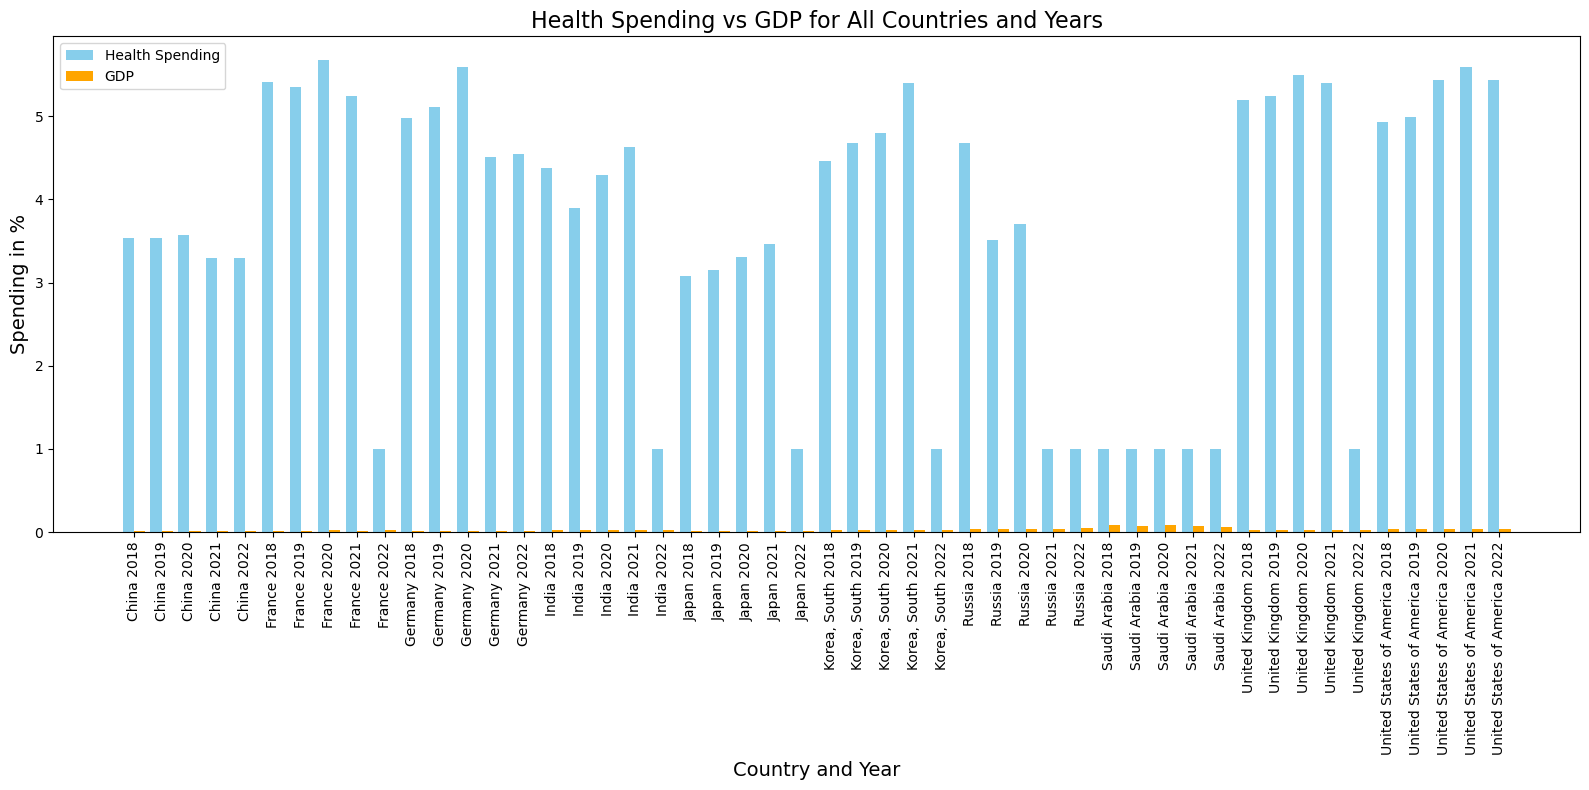

Military, Health and Education Spending Analysis Menu:
1. Military,Education and Health Spending (fixed value and %)
2. Compare Miltary data to thats Country GDP
3. Compare Educational data to thats Country GDP
4. Compare Health data to thats Country GDP
5. Compare Person Educational Spending to per person GDP (fixed value and %)
6. Compare Person Healthcare Spending to per person GDP (fixed value and %)
7. Compare Person Military Spending to per person GDP (fixed value and %)
8. Find the fastest growing countries in Education spending (fixed value and %)
9. Find the fastest growing countries in Health spending (fixed value and %)
0. Exit



Please select an option (0-9):  0



Exiting the program.


In [811]:
def display_menu():
    print("Military, Health and Education Spending Analysis Menu:")
    print("1. Military,Education and Health Spending (fixed value and %)")
    print("2. Compare Miltary data to thats Country GDP")
    print("3. Compare Educational data to thats Country GDP")
    print("4. Compare Health data to thats Country GDP")
    print("5. Compare Person Educational Spending to per person GDP (fixed value and %)")
    print("6. Compare Person Healthcare Spending to per person GDP (fixed value and %)")
    print("7. Compare Person Military Spending to per person GDP (fixed value and %)")
    print("8. Find the fastest growing countries in Education spending (fixed value and %)")
    print("9. Find the fastest growing countries in Health spending (fixed value and %)")
    print("0. Exit")

def get_user_choice():
    choice = int(input("\nPlease select an option (0-9): "))
    return choice


def main():
    while True:
        display_menu()
        choice = get_user_choice()

        if choice == 1:
            plot_average_spending(health_spending_average, education_average, military_average)
            plot_absolute_spending(health_spending_average, education_average, military_average)
            
        elif choice == 2:
            plot_military_expenditure_vs_gdp_percent(military_GDP, country, save_path="military_spending_gdp.png")
        elif choice == 3:
            plot_education_vs_gdp(countries_education_gdp)
            
        elif choice == 4:
            plot_health_spending_vs_gdp(countries_health_gdp)
            
        elif choice == 5:
            plot_education_vs_gdp_all_years(merged_data_education)
            plot_education_spending_percentage_vs_gdp_all_years(merged_data_education)
            
        elif choice == 6:
            plot_health_spending_vs_gdp_absolute_all_years(merged_data_health)
            plot_health_spending_percentage_vs_gdp_all_years(merged_data_health)


        elif choice == 7:
            plot_military_spending_vs_gdp_ab_all_years(military_capta, gdp_pc)
            plot_military_spending_vs_gdp_percentage_all_years(military_capta, gdp_pc)
            
        elif choice == 8:
            plot_education_countries_growth(top_countries_health, spending_type="Healthcare")

        elif choice == 9:
            plot_health_countries_growth(top_countries_health, spending_type="Healthcare")
            
        elif choice == 0:
            print("\nExiting the program.")
            break
        else:
            print("\nInvalid choice. Please select a valid option.")

if __name__ == "__main__":
    main()
